In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Wczytanie 
df = pd.read_csv("kidney_disease.csv")
df.head(5)

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [3]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [4]:
df.shape

(400, 26)

In [5]:
df.drop(columns=['id'], inplace=True) #Usuwam kolumne id ponieważ nie wnosi ona żadnych istotnych informacji
df['classification'].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [6]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'classification']

In [7]:
df.describe()

age  blood_pressure  specific_gravity     albumin       sugar  \
count  391.000000      388.000000        353.000000  354.000000  351.000000   
mean    51.483376       76.469072          1.017408    1.016949    0.450142   
std     17.169714       13.683637          0.005717    1.352679    1.099191   
min      2.000000       50.000000          1.005000    0.000000    0.000000   
25%     42.000000       70.000000          1.010000    0.000000    0.000000   
50%     55.000000       80.000000          1.020000    0.000000    0.000000   
75%     64.500000       80.000000          1.020000    2.000000    0.000000   
max     90.000000      180.000000          1.025000    5.000000    5.000000   

       blood_glucose_random  blood_urea  serum_creatinine      sodium  \
count            356.000000  381.000000        383.000000  313.000000   
mean             148.036517   57.425722          3.072454  137.528754   
std               79.281714   50.503006          5.741126   10.408752   
min               22.000000    1.500000          0.400000    4.500000   
25%               99.000000   27.000000          0.900000  135.000000   
50%              121.000000   42.000000          1.300000  138.000000   
75%              163.000000   66.000000          2.800000  142.000000   
max              490.000000  391.000000         76.000000  163.000000   

        potassium  haemoglobin  
count  312.000000   348.000000  
mean     4.627244    12.526437  
std      3.193904     2.912587  
min      2.500000     3.100000  
25%      3.800000    10.300000  
50%      4.400000    12.650000  
75%      4.900000    15.000000  
max     47.000000    17.800000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [9]:
df.isnull().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       130
white_blood_cell_count     105
potassium                   88
sodium                      87
packed_cell_volume          70
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
classification               0
dtype: int64

In [10]:
#Szybki podgląd na typy kolumn, jak widać niektóre z nich są zapisane w postaci object
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume          object
white_blood_cell_count      object
red_blood_cell_count        object
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
classification              object
dtype: object

In [11]:
#Wypisanie unikalnych wartości dla kolumn zapisanych w typie object 
def showUnique(x):
    for c in x.columns:
        if x[c].dtype == "object":
            print("Kolumna " + str(c) + ":\t" + str(df[c].unique()))
showUnique(df)

Kolumna red_blood_cells:	[nan 'normal' 'abnormal']
Kolumna pus_cell:	['normal' 'abnormal' nan]
Kolumna pus_cell_clumps:	['notpresent' 'present' nan]
Kolumna bacteria:	['notpresent' 'present' nan]
Kolumna packed_cell_volume:	['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']
Kolumna white_blood_cell_count:	['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11

In [12]:
#Jak można zauważyć większość kolumn to kolumny binarne dlatego wystarczy je zamienić tak aby posiadały tylko wartości 0 lub 1
#Natomiast kolumny packed_cell_volume, white_blood_cell_count i red_blood_cell_count muszą zostąc zamienione na typ float
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce') #coerce zamienai wartosci takie jak np\t? na nan aby uniknąć problemów
df['packed_cell_volume'].dtype

dtype('float64')

In [13]:
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'].dtype

dtype('float64')

In [14]:
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['white_blood_cell_count'].dtype

dtype('float64')

In [15]:
#Kolumny do zamiany na typ float zniknęły, natomiast pozostaly jeszcze kolumny które trzeba przekonwertować do postaci binarnej
showUnique(df)

Kolumna red_blood_cells:	[nan 'normal' 'abnormal']
Kolumna pus_cell:	['normal' 'abnormal' nan]
Kolumna pus_cell_clumps:	['notpresent' 'present' nan]
Kolumna bacteria:	['notpresent' 'present' nan]
Kolumna hypertension:	['yes' 'no' nan]
Kolumna diabetes_mellitus:	['yes' 'no' ' yes' '\tno' '\tyes' nan]
Kolumna coronary_artery_disease:	['no' 'yes' '\tno' nan]
Kolumna appetite:	['good' 'poor' nan]
Kolumna peda_edema:	['no' 'yes' nan]
Kolumna aanemia:	['no' 'yes' nan]
Kolumna classification:	['ckd' 'ckd\t' 'notckd']


In [16]:
#Najpierw pozamieniam rzeczy z \t
df.replace({'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'}, inplace=True)
df.replace({'ckd\t': 'ckd'}, inplace=True)

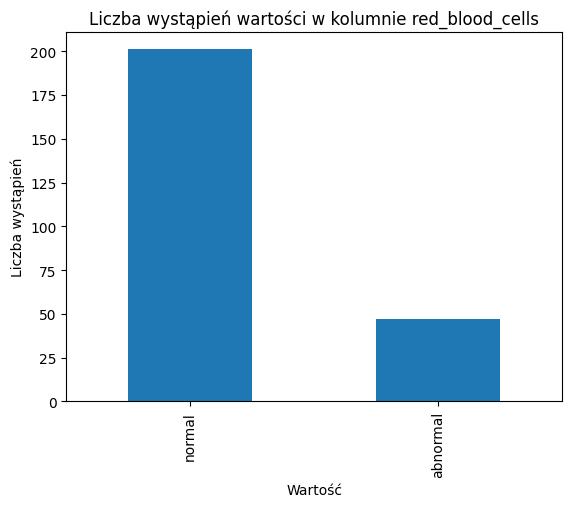

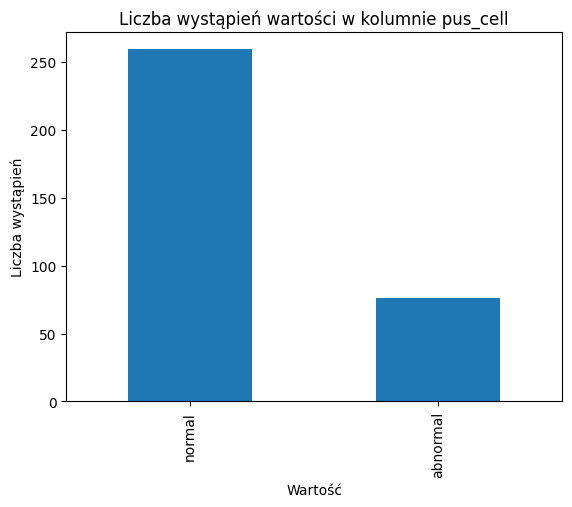

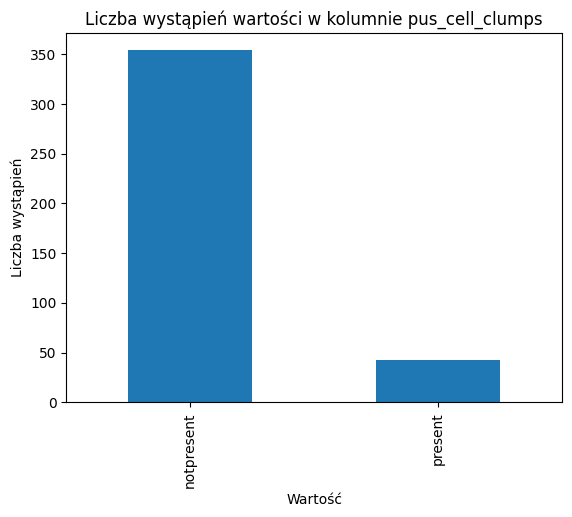

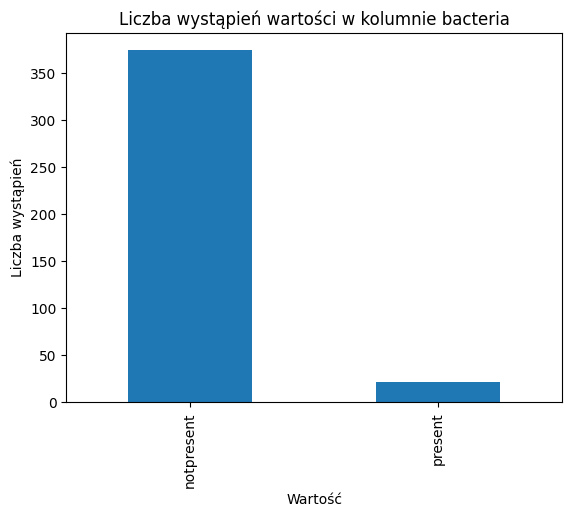

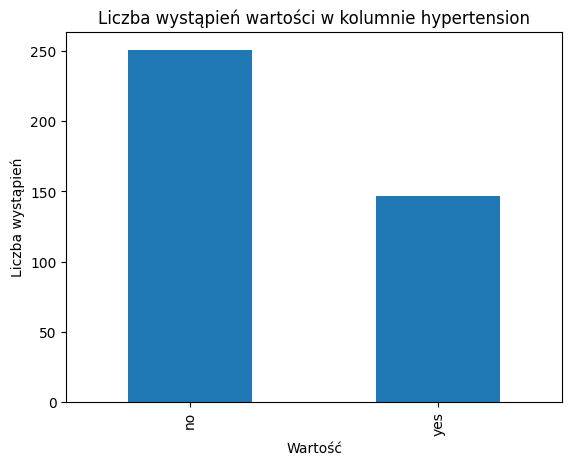

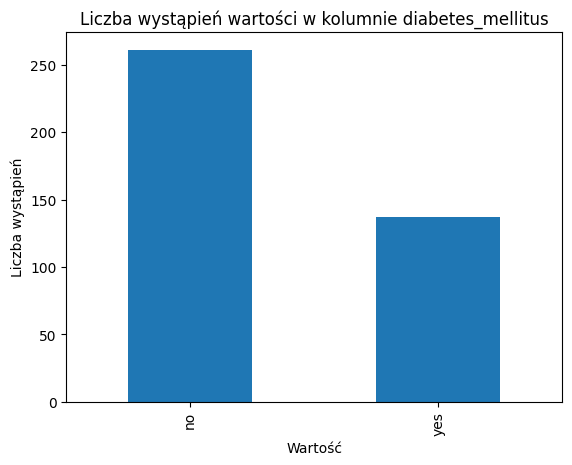

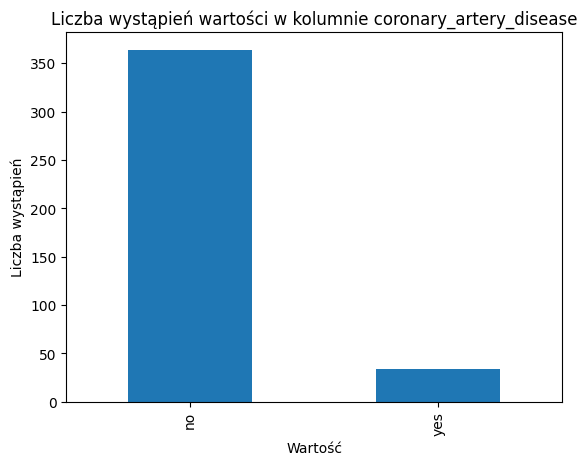

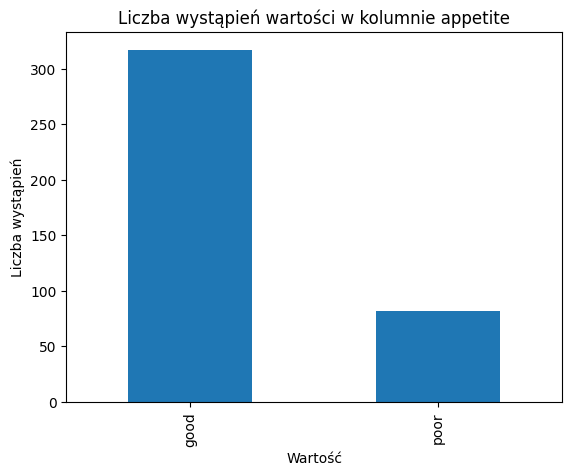

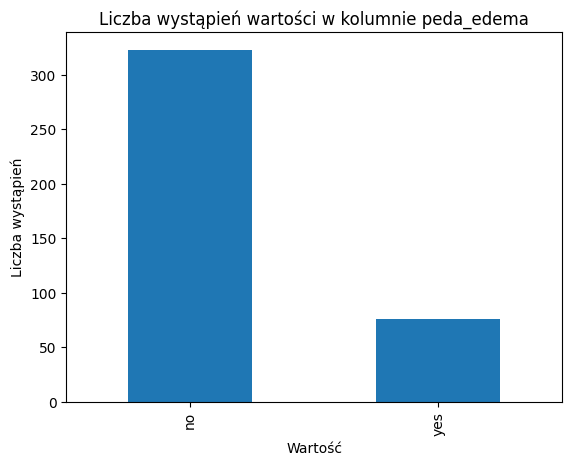

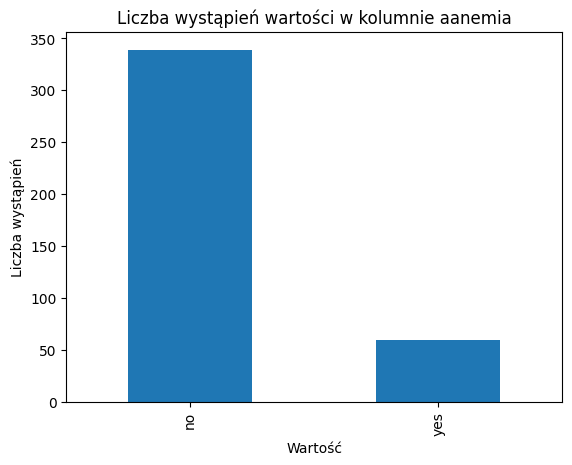

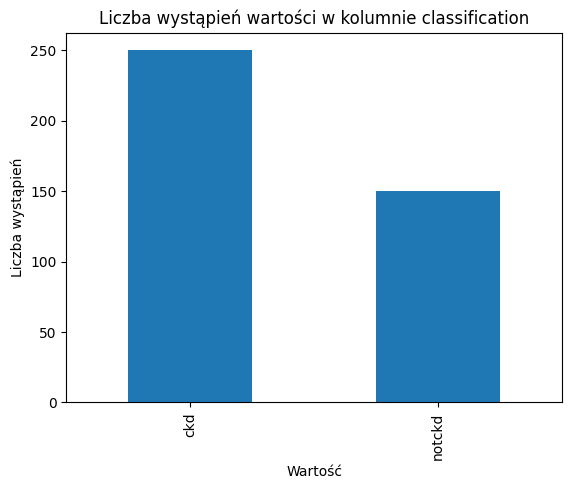

In [17]:
for c in df.columns:
    if df[c].dtype == "object":
        counts = df[c].value_counts()
        counts.plot(kind='bar')
        plt.title('Liczba wystąpień wartości w kolumnie ' + str(c))
        plt.xlabel('Wartość')
        plt.ylabel('Liczba wystąpień')
        plt.show()

In [18]:
df.replace({'normal': 0, 'abnormal': 1}, inplace=True)
df.replace({'notpresent': 0, 'present': 1}, inplace=True)
df.replace({'no': 0, 'yes': 1,'\tno': 0, '\tyes': 1, ' yes':1}, inplace=True)
df.replace({'poor': 0, 'good': 1}, inplace=True)
df.replace({'notckd': 0, 'ckd': 1, 'ckd\t': 1}, inplace=True)

C:\Users\Daru\AppData\Local\Temp\ipykernel_19200\3625266964.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'normal': 0, 'abnormal': 1}, inplace=True)
C:\Users\Daru\AppData\Local\Temp\ipykernel_19200\3625266964.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'notpresent': 0, 'present': 1}, inplace=True)
C:\Users\Daru\AppData\Local\Temp\ipykernel_19200\3625266964.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, e

In [19]:
showUnique(df) #Funkcja nic nie zwraca to znaczy, że nie ma juz zadnych kolumn z wartościami o typie object

In [20]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells            float64
pus_cell                   float64
pus_cell_clumps            float64
bacteria                   float64
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension               float64
diabetes_mellitus          float64
coronary_artery_disease    float64
appetite                   float64
peda_edema                 float64
aanemia                    float64
classification               int64
dtype: object

In [21]:
df.sample(10) #Wszystko wygląda raczej ok, natomiast nadal są wartości null

age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
364  73.0            80.0             1.025      0.0    0.0              0.0   
223  71.0            90.0             1.010      0.0    3.0              NaN   
396  42.0            70.0             1.025      0.0    0.0              0.0   
272  56.0            80.0             1.025      0.0    0.0              0.0   
340  32.0            70.0             1.025      0.0    0.0              0.0   
238  72.0           100.0               NaN      NaN    NaN              NaN   
296  41.0            70.0             1.020      0.0    0.0              0.0   
85   70.0            70.0             1.015      2.0    NaN              NaN   
136  46.0            90.0             1.020      NaN    NaN              NaN   
318  61.0            70.0             1.025      0.0    0.0              0.0   

     pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  ...  \
364       0.0              0.0       0.0                 118.0  ...   
223       0.0              0.0       0.0                 303.0  ...   
396       0.0              0.0       0.0                  75.0  ...   
272       0.0              0.0       0.0                 139.0  ...   
340       0.0              0.0       0.0                 100.0  ...   
238       NaN              0.0       0.0                 201.0  ...   
296       0.0              0.0       0.0                 125.0  ...   
85        NaN              0.0       0.0                   NaN  ...   
136       0.0              0.0       0.0                 213.0  ...   
318       0.0              0.0       0.0                 120.0  ...   

     packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
364                45.0                  9300.0                   4.7   
223                38.0                  9200.0                   4.6   
396                54.0                  7800.0                   6.2   
272                42.0                  5600.0                   5.5   
340                43.0                  6700.0                   5.9   
238                28.0                     NaN                   NaN   
296                41.0                  6300.0                   5.9   
85                  NaN                     NaN                   NaN   
136                 NaN                     NaN                   NaN   
318                52.0                  7000.0                   5.3   

     hypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
364           0.0                0.0                      0.0       1.0   
223           1.0                1.0                      0.0       1.0   
396           0.0                0.0                      0.0       1.0   
272           0.0                0.0                      0.0       1.0   
340           0.0                0.0                      0.0       1.0   
238           1.0                1.0                      0.0       1.0   
296           0.0                0.0                      0.0       1.0   
85            0.0                1.0                      0.0       0.0   
136           1.0                1.0                      0.0       1.0   
318           0.0                0.0                      0.0       1.0   

     peda_edema  aanemia  classification  
364         0.0      0.0               0  
223         0.0      0.0               1  
396         0.0      0.0               0  
272         0.0      0.0               0  
340         0.0      0.0               0  
238         0.0      1.0               1  
296         0.0      0.0               0  
85          1.0      0.0               1  
136         0.0      0.0               1  
318         0.0      0.0               0  

[10 rows x 25 columns]

In [22]:
df.isnull().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
classification               0
dtype: int64

In [23]:
#Funkcja zamienia NaN na srednia w danej kolumnie tylko gdy nie jest to kolumna zawierająca wartości binarne
def changeNanToAvg(df):
    for column in df.columns:
        if df[column].dtype != 'object':  
            if not all(value in (0, 1) for value in df[column].dropna()):  # Sprawdzanie, czy wartości nie są tylko 0 lub 1
                mean_value = df[column].mean()  # Średnia dla kolumny
                df[column] = df[column].fillna(mean_value)
changeNanToAvg(df)

In [24]:
df.isnull().sum().sort_values(ascending=False)

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
coronary_artery_disease      2
diabetes_mellitus            2
hypertension                 2
aanemia                      1
peda_edema                   1
appetite                     1
age                          0
packed_cell_volume           0
red_blood_cell_count         0
white_blood_cell_count       0
sodium                       0
haemoglobin                  0
potassium                    0
blood_pressure               0
serum_creatinine             0
blood_urea                   0
blood_glucose_random         0
sugar                        0
albumin                      0
specific_gravity             0
classification               0
dtype: int64

In [25]:
df['red_blood_cells'].value_counts()

red_blood_cells
0.0    201
1.0     47
Name: count, dtype: int64

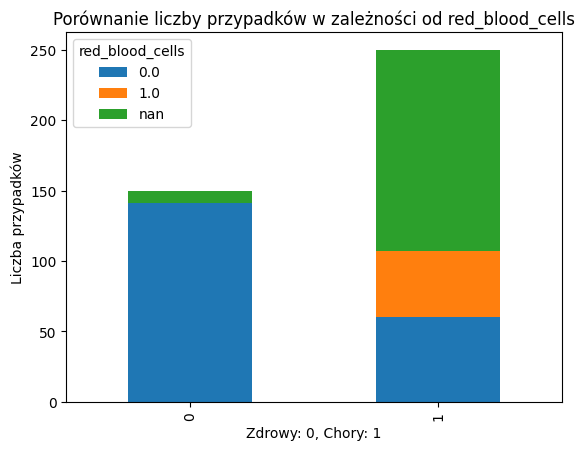

In [26]:
#Poniewaz ciezko cokolwiek z tego wywnioskować lepiej będzie usunąć tą kolumne
ct = pd.crosstab(df['classification'], df['red_blood_cells'], dropna=False) 
ct.plot(kind='bar', stacked=True)
plt.title('Porównanie liczby przypadków w zależności od red_blood_cells')
plt.xlabel('Zdrowy: 0, Chory: 1')
plt.ylabel('Liczba przypadków')
plt.show()

In [27]:
df.drop(columns=['red_blood_cells'], inplace=True)

In [28]:
#Poniewaz reszta kolumn ma małą ilość wartości Null usuwam wiersze gdzie znajdja sie te wartosci (z 400 wierszy usunięte zostaje około 70)
df = df.dropna()
df['classification'].value_counts()

classification
1    194
0    135
Name: count, dtype: int64

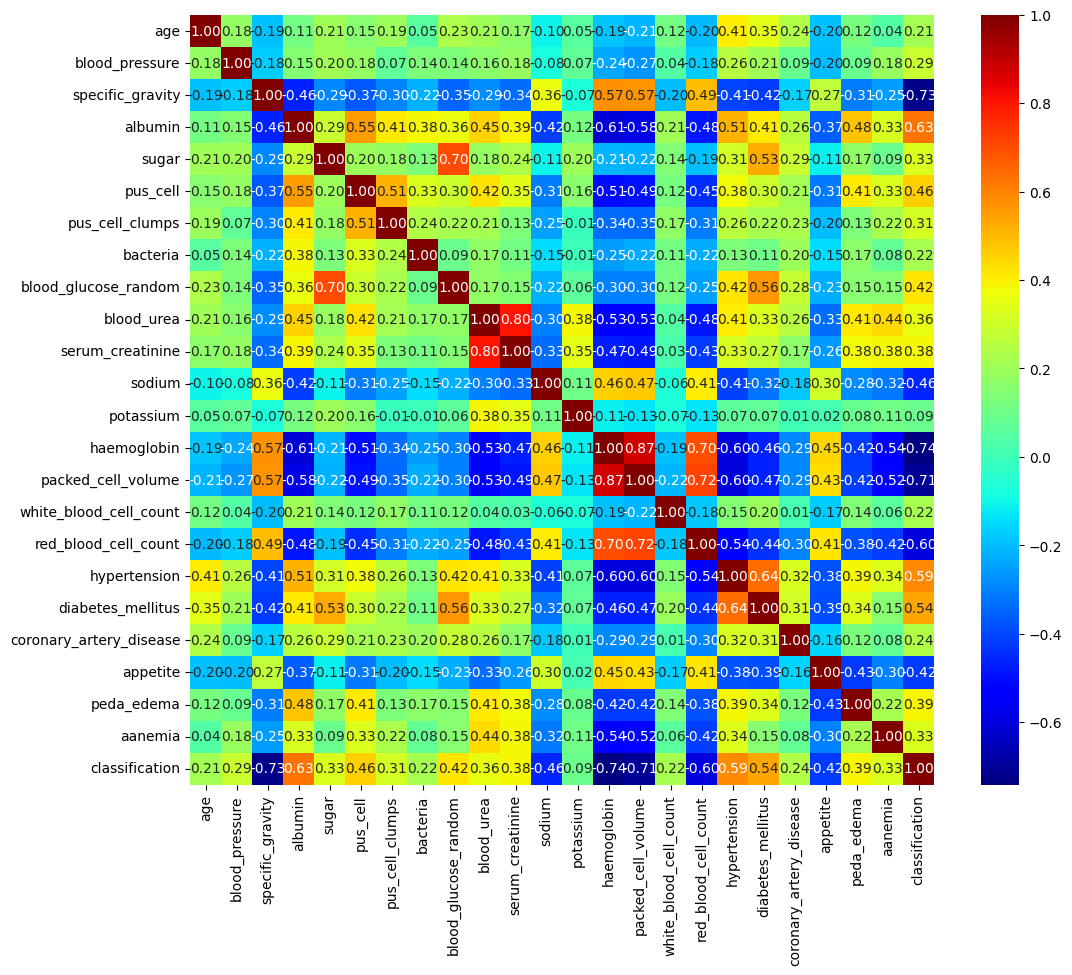

In [29]:
#Korelacje
df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True, cmap="jet",fmt='.2f')
plt.show()

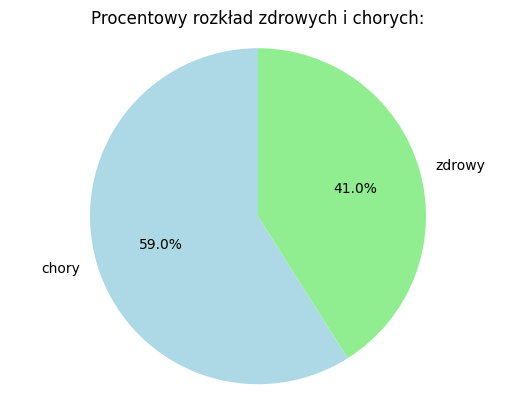

In [30]:
#Wykres stosunku chorych i zdrowych
ill = (df['classification'] == 1).sum()
healthy = (df['classification'] == 0).sum()
ill_percentage = (ill / len(df['classification'])) * 100
healthy_percentage = (healthy / len(df['classification'])) * 100
values = [ill, healthy]
plt.pie(values, labels=['chory', 'zdrowy'], colors=['lightblue', 'lightgreen'], autopct='%1.1f%%', startangle=90)
plt.title('Procentowy rozkład zdrowych i chorych:')
plt.axis('equal') 
plt.show()

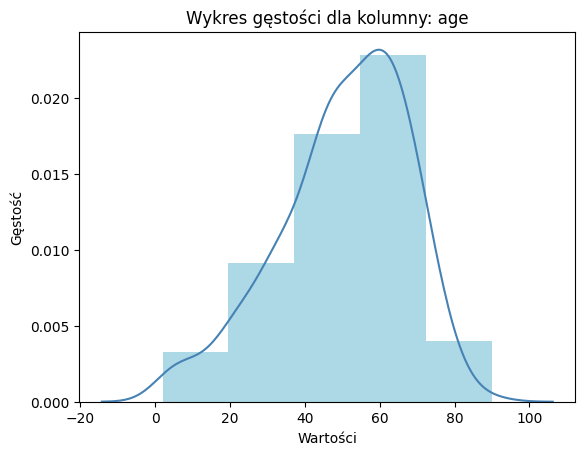

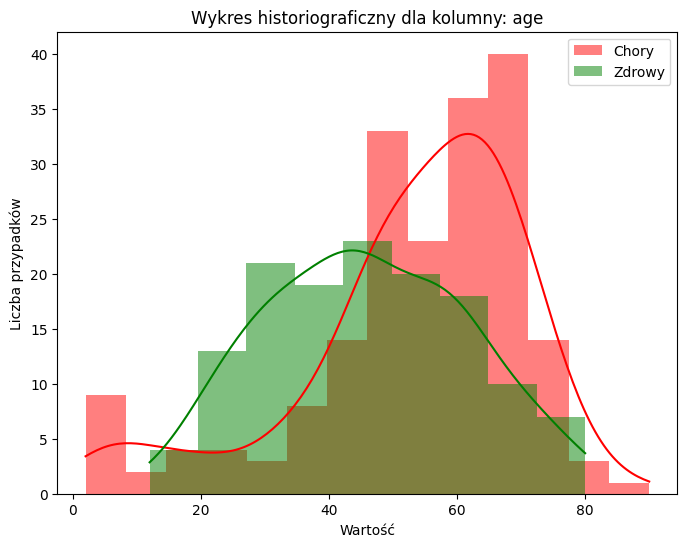

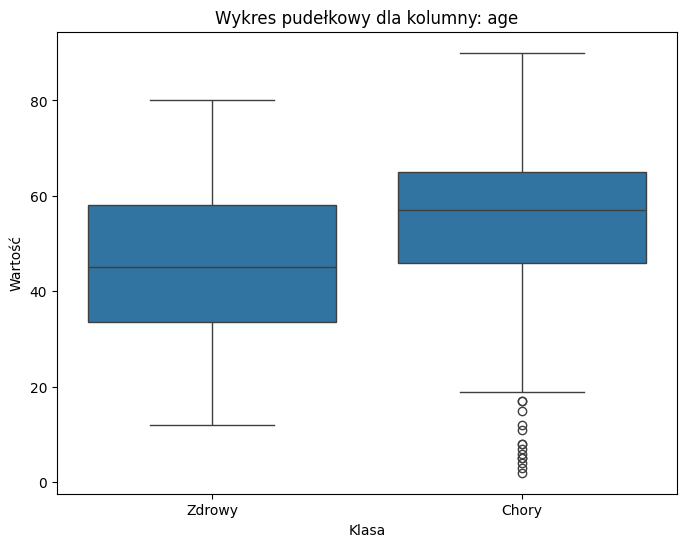

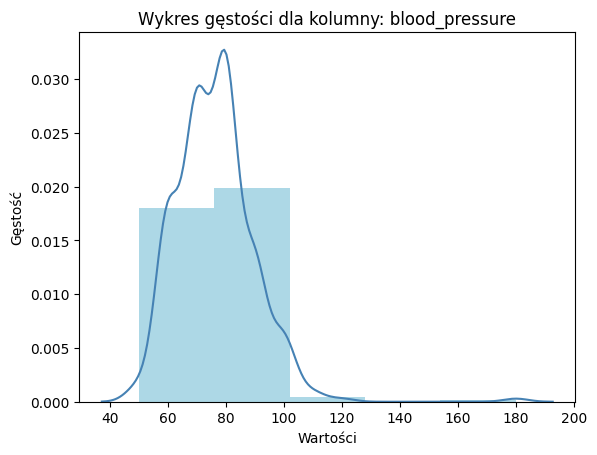

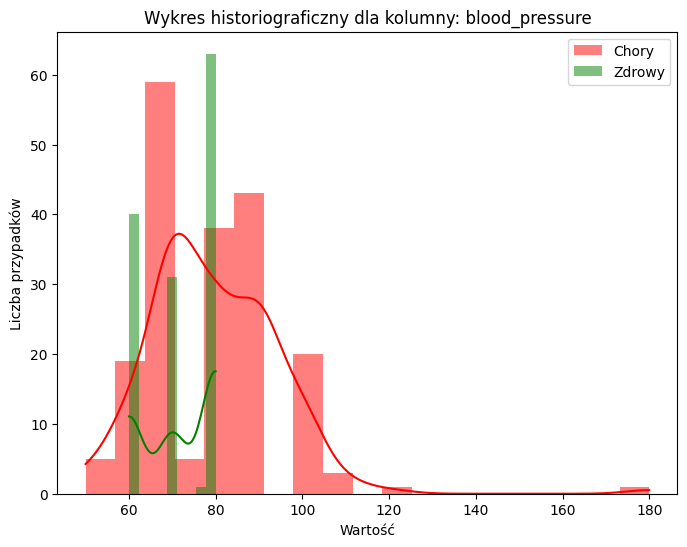

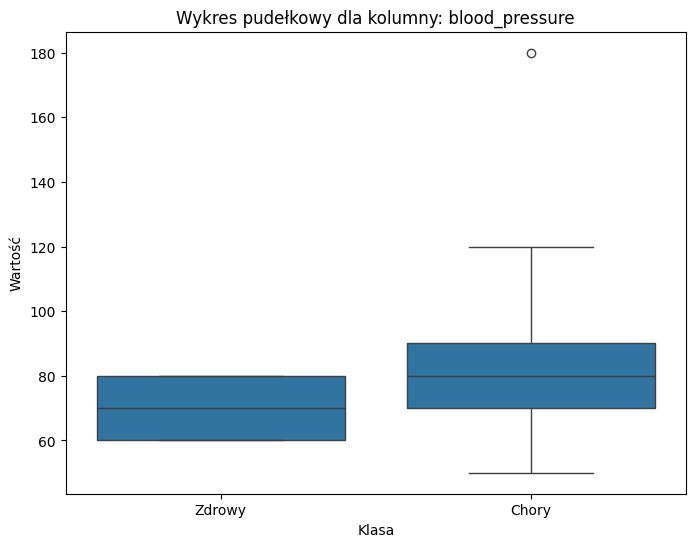

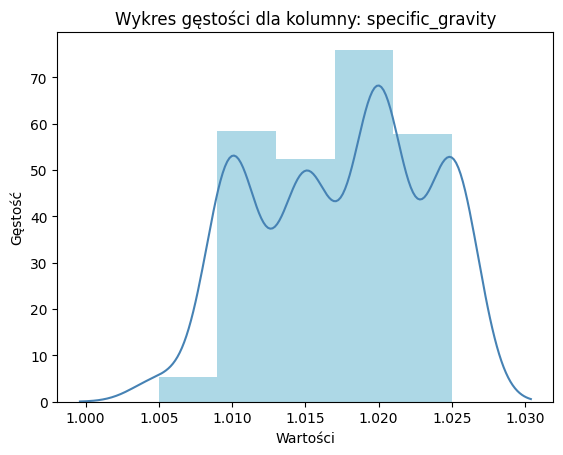

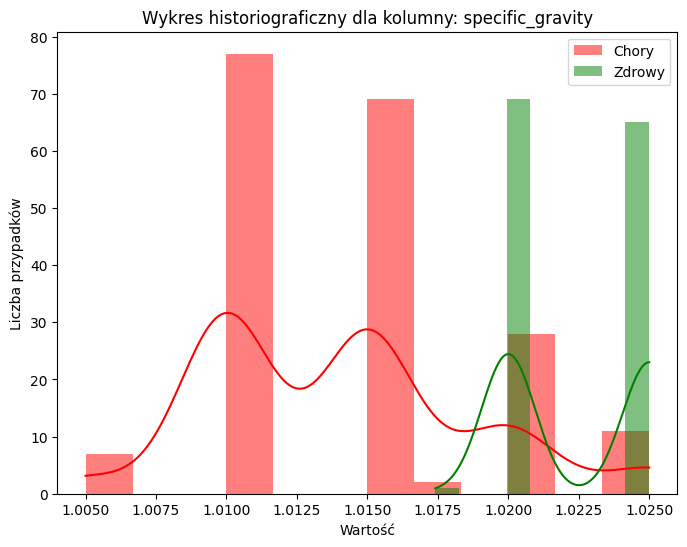

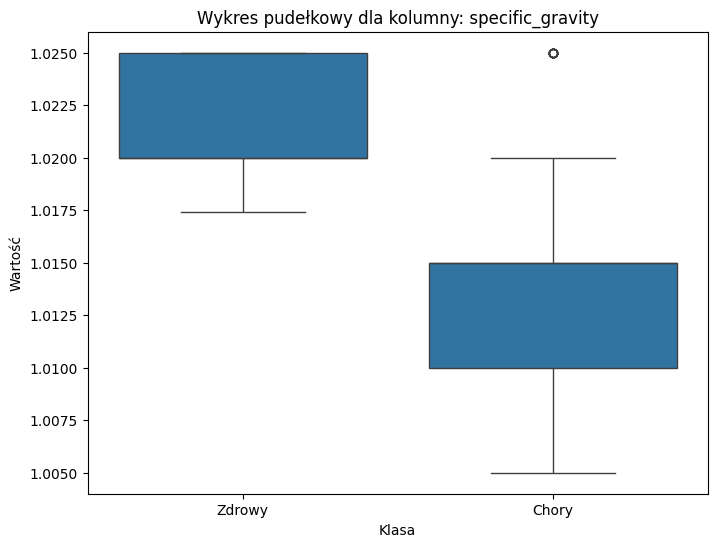

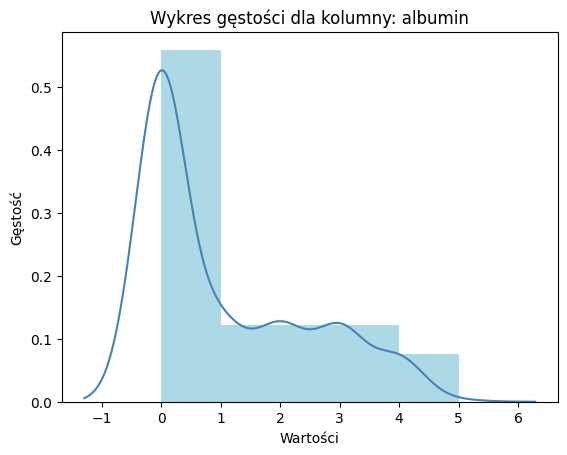

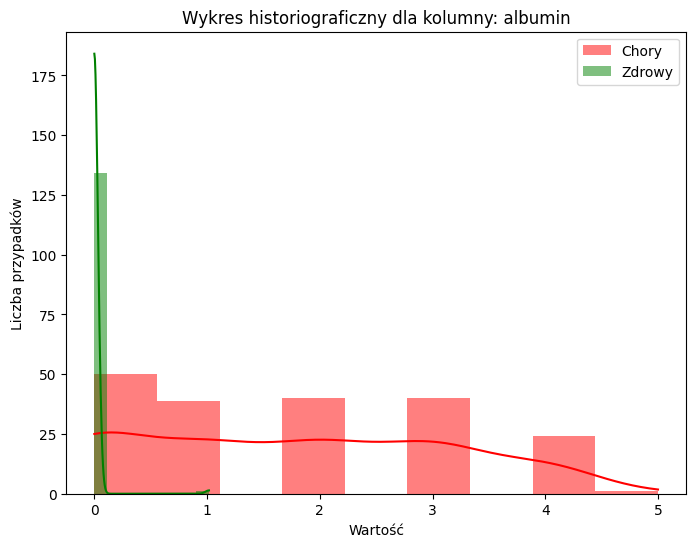

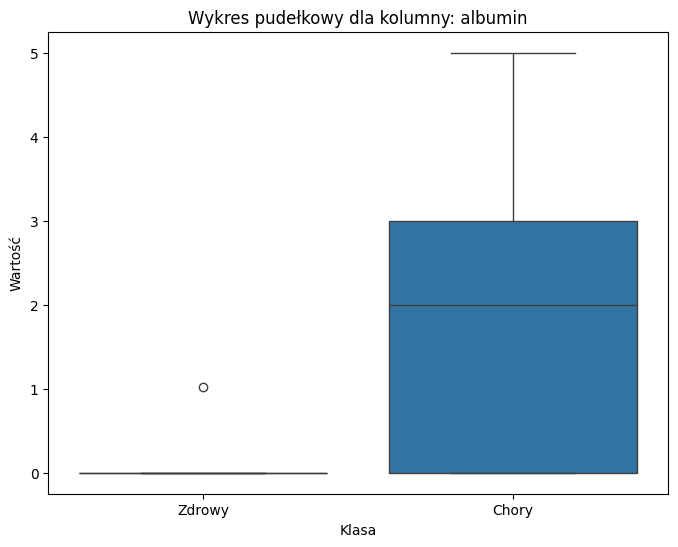

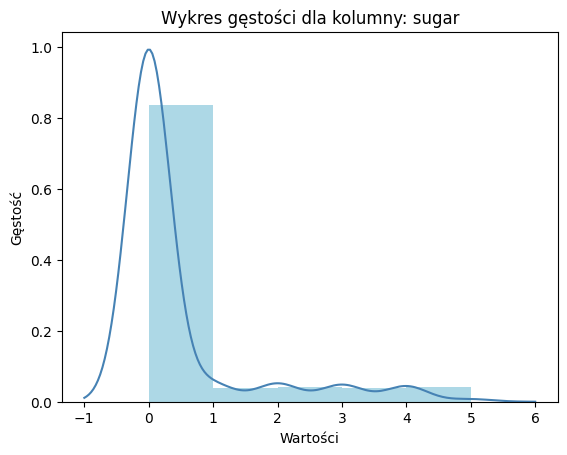

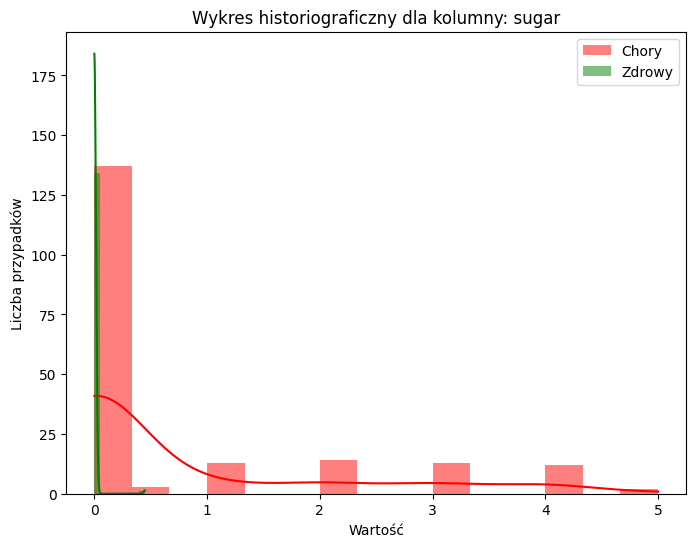

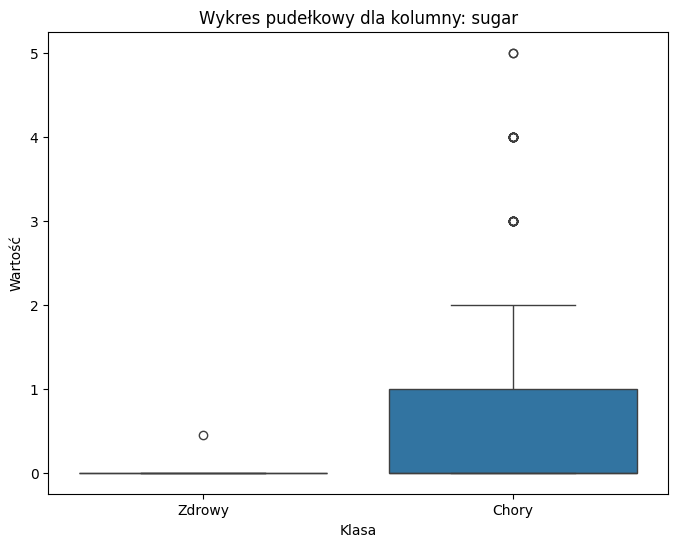

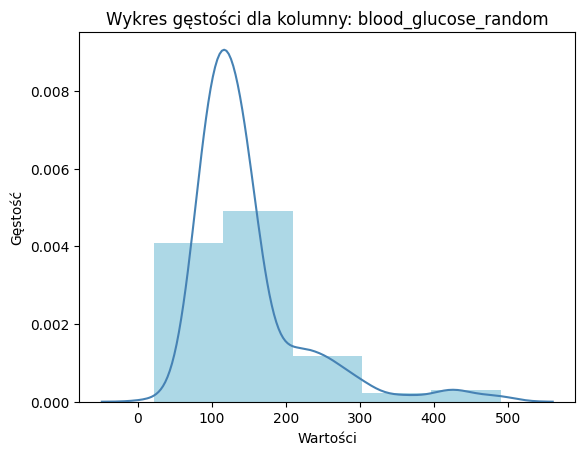

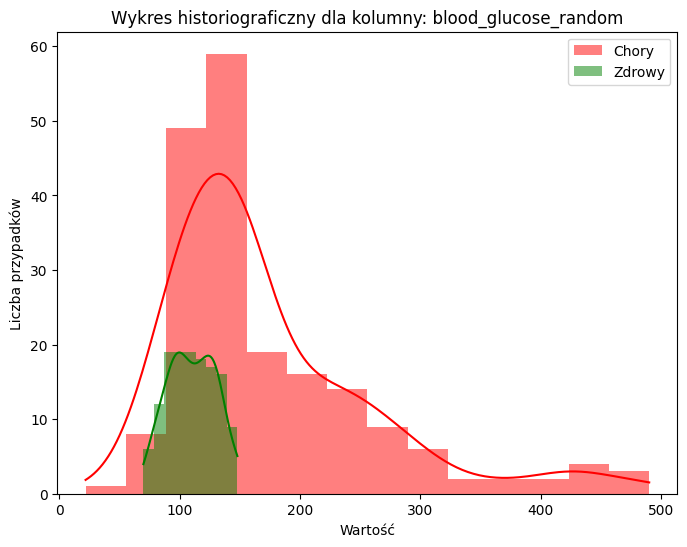

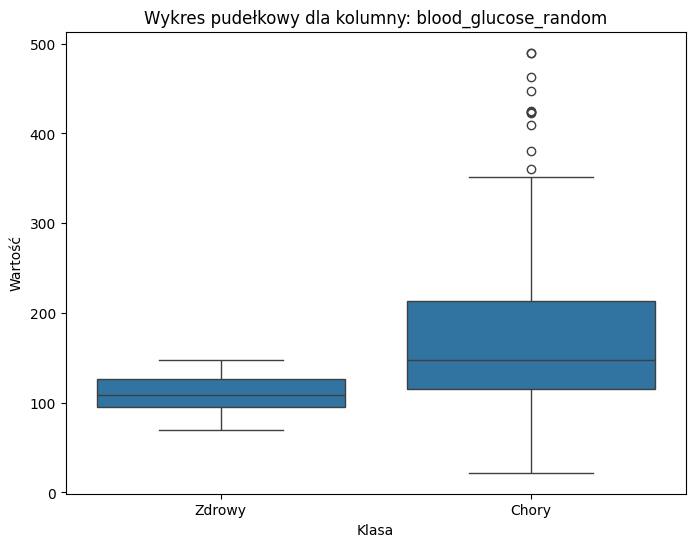

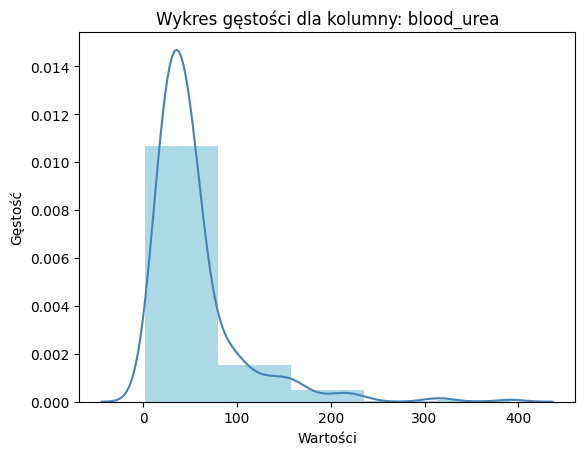

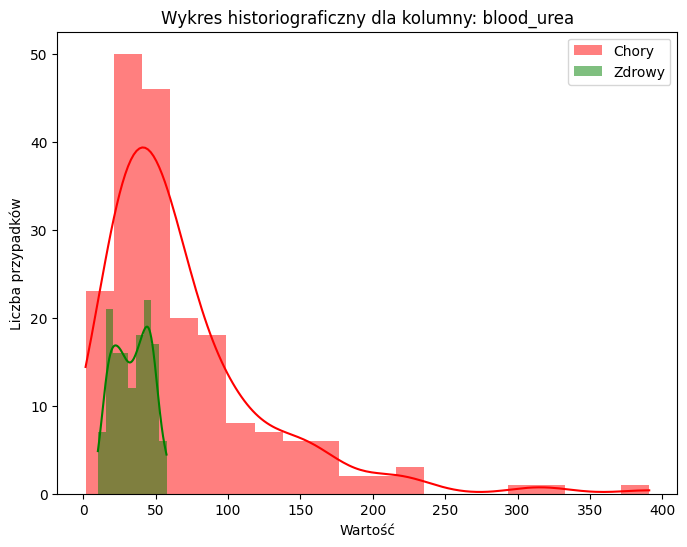

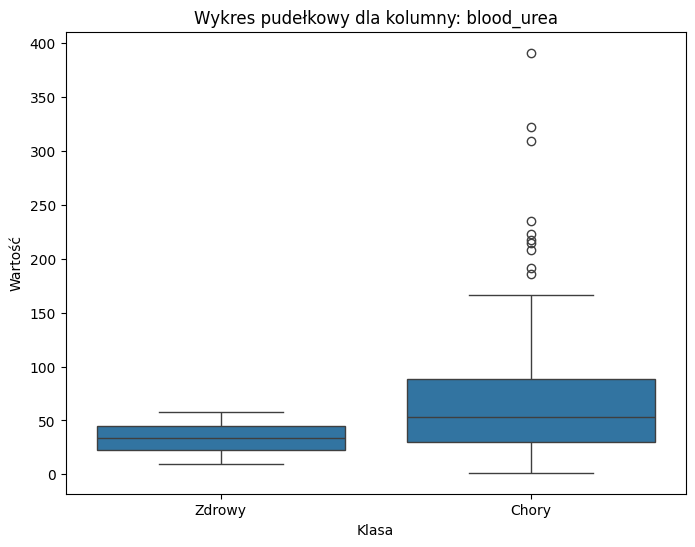

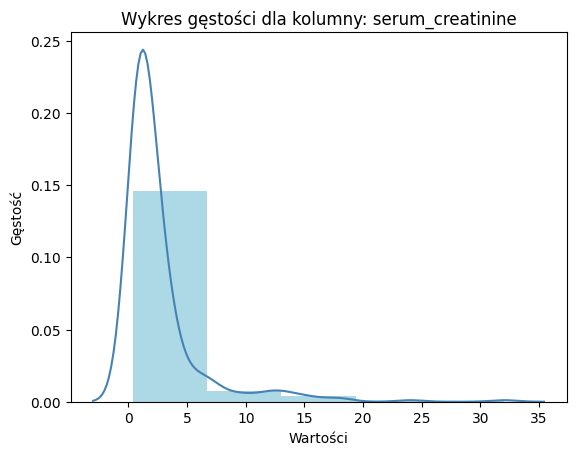

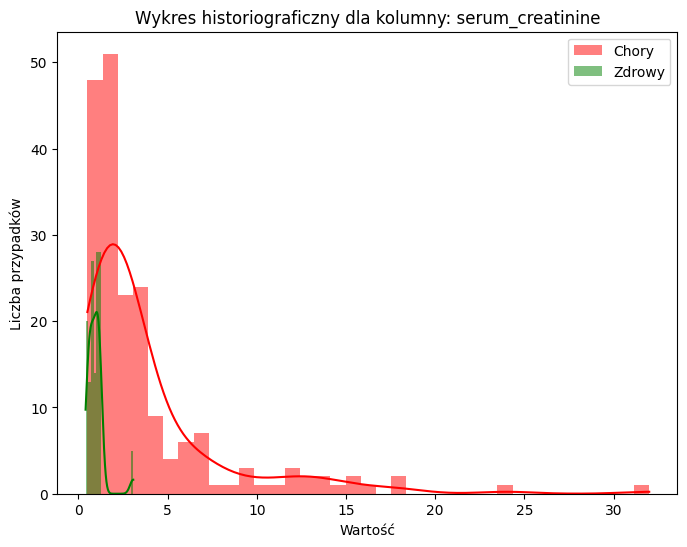

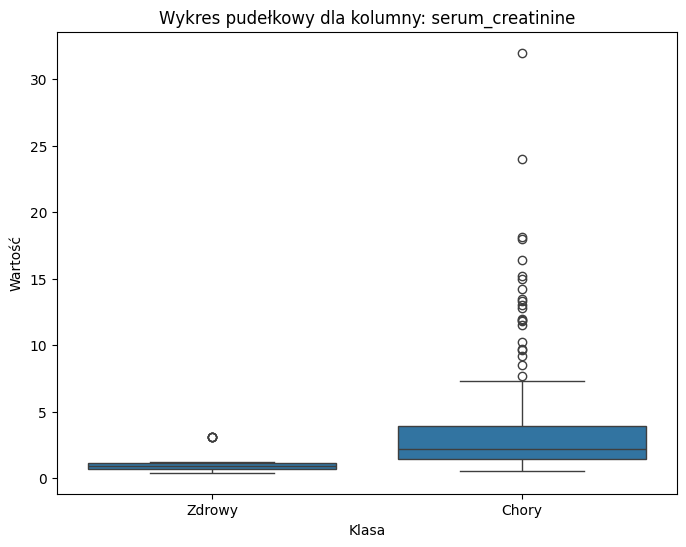

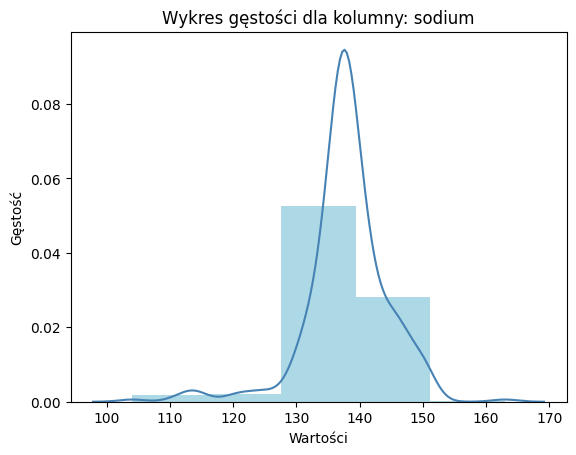

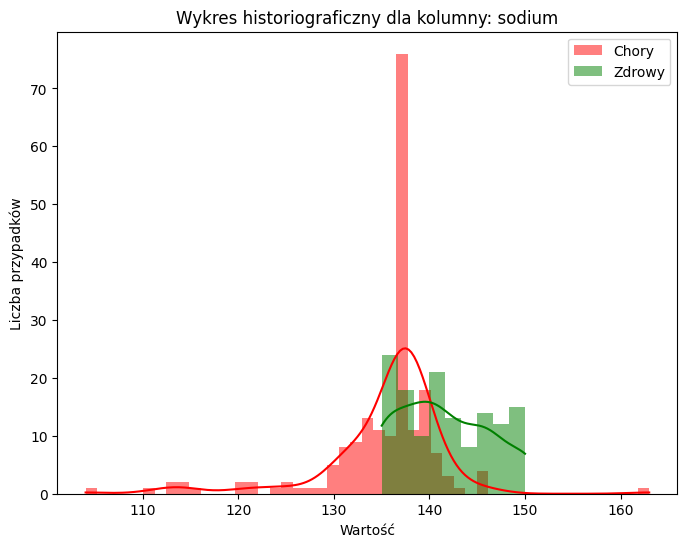

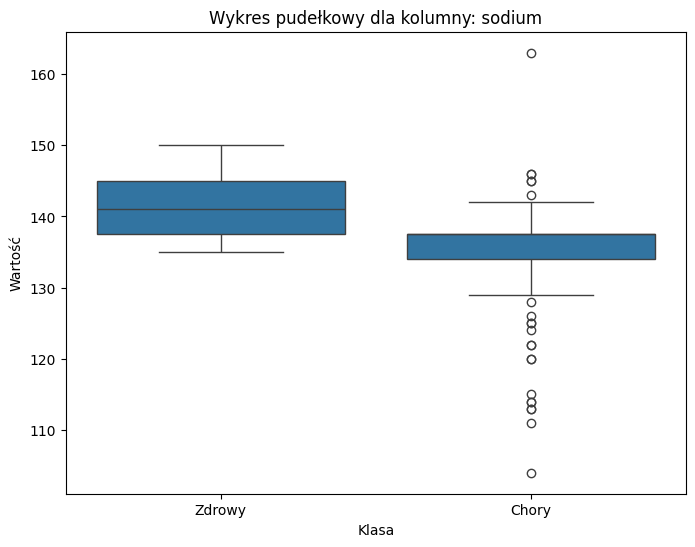

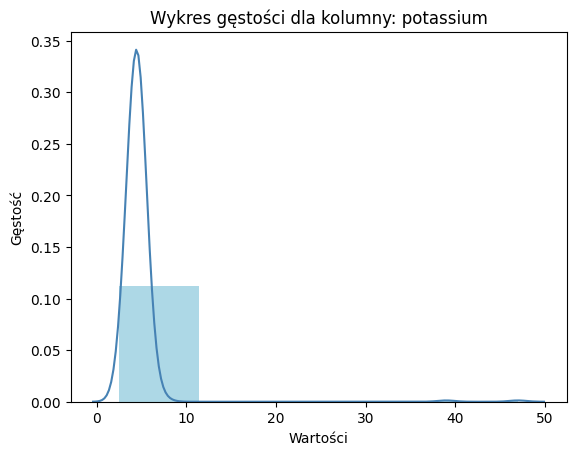

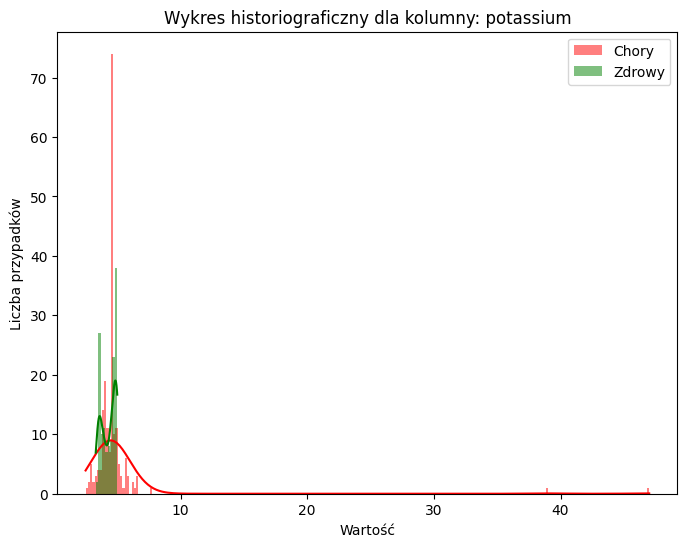

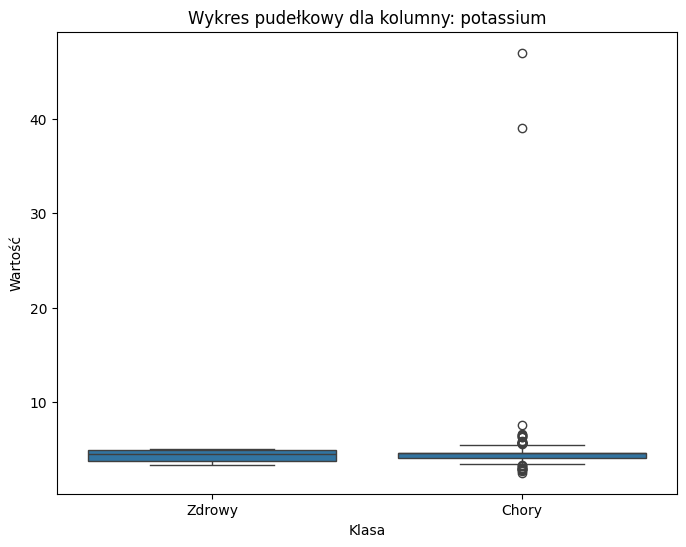

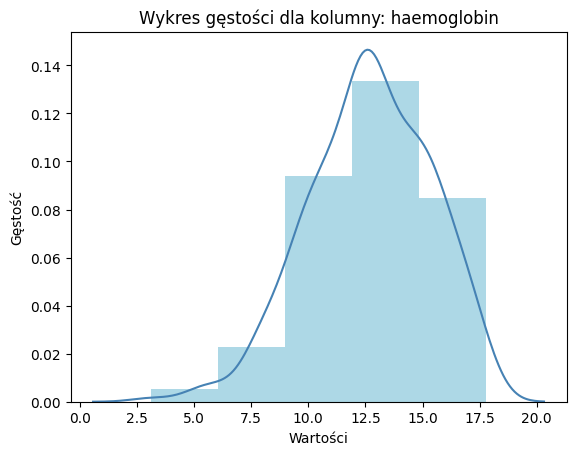

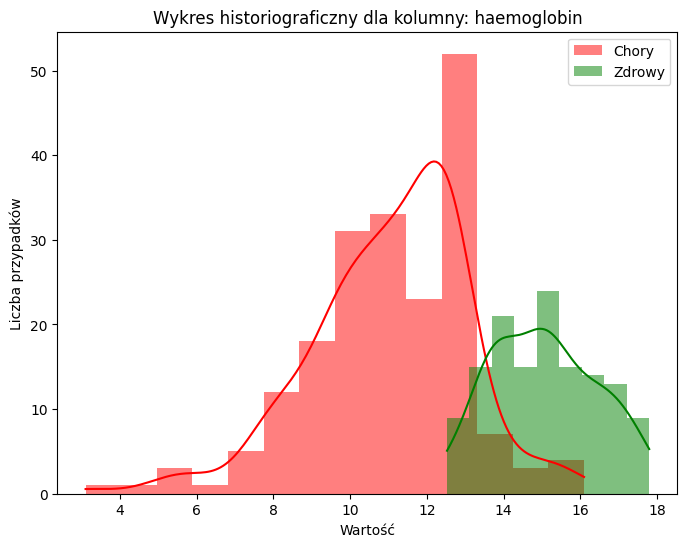

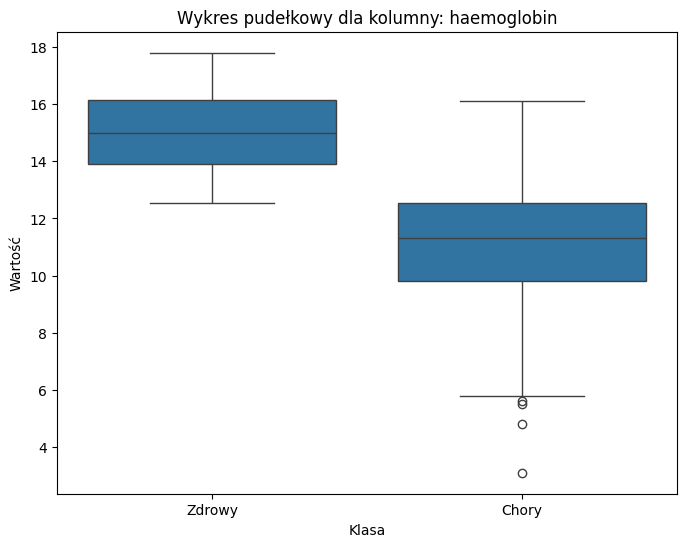

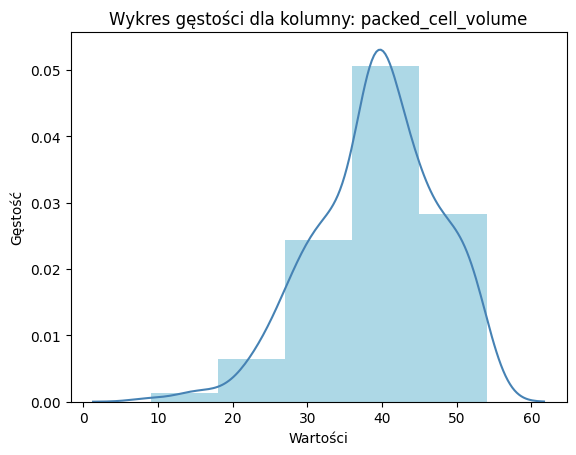

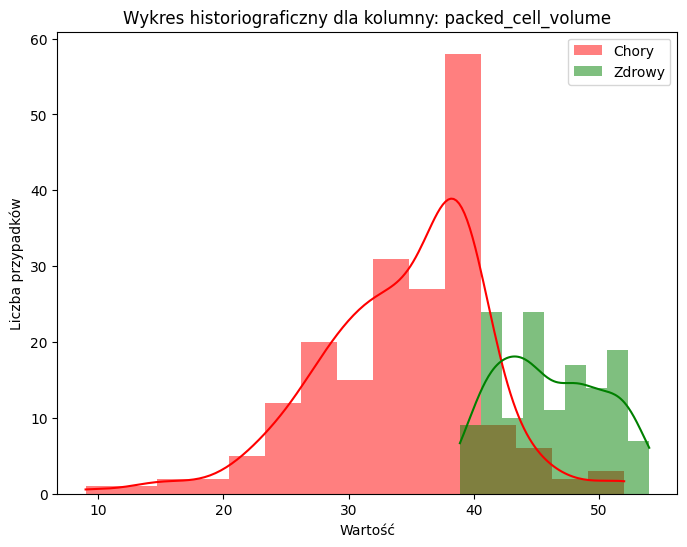

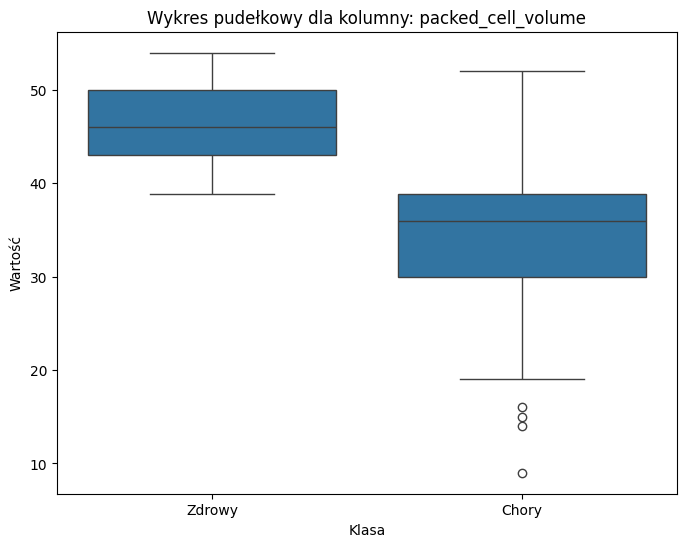

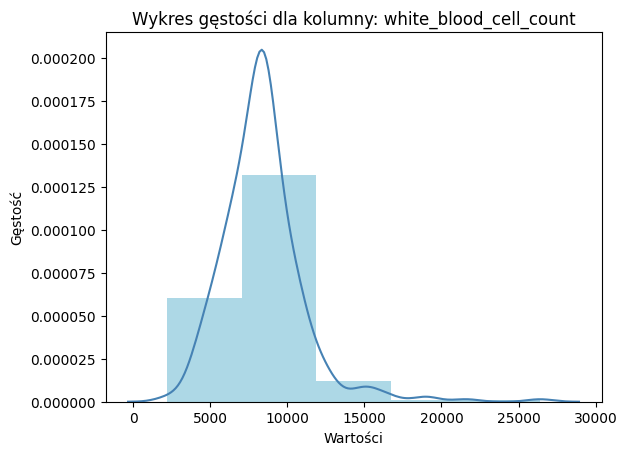

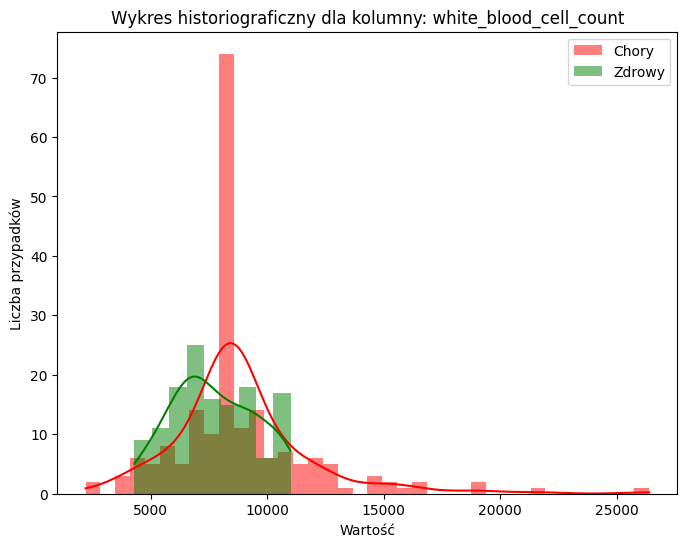

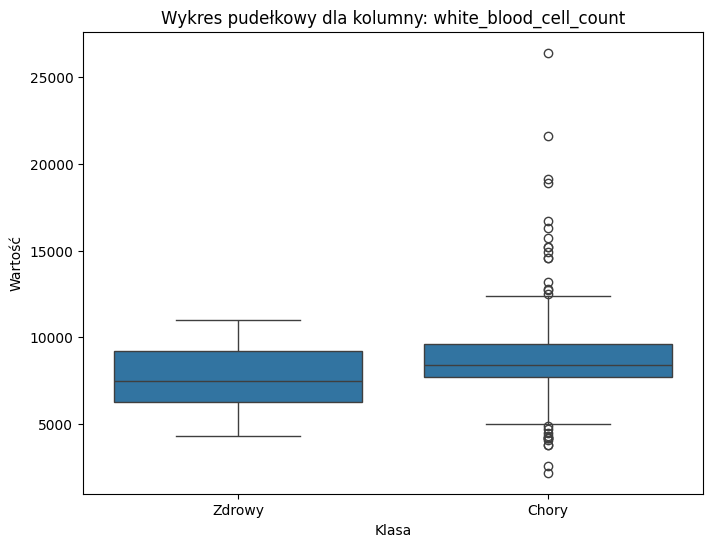

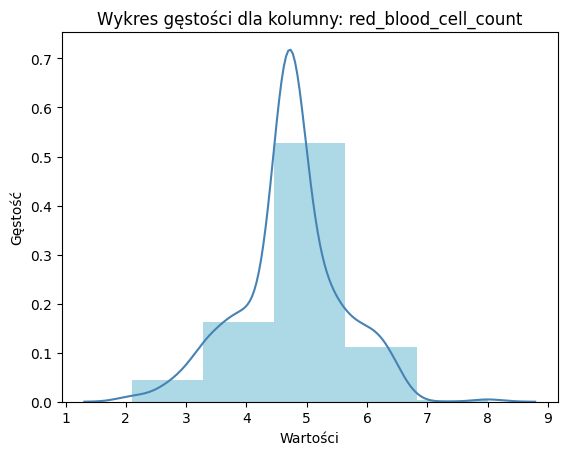

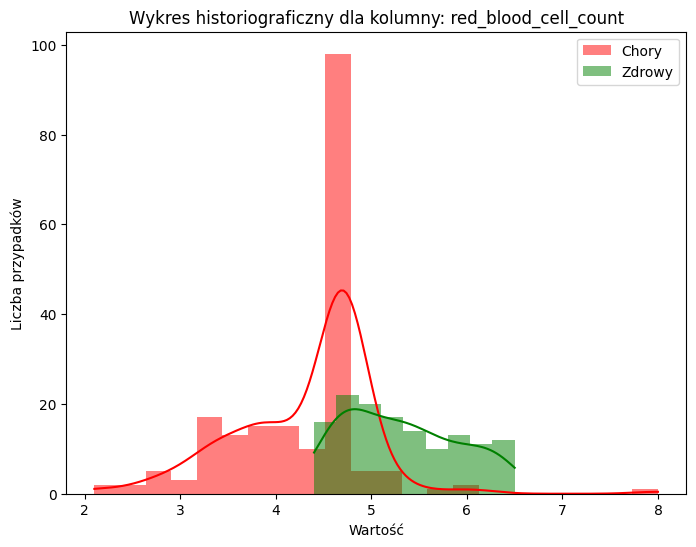

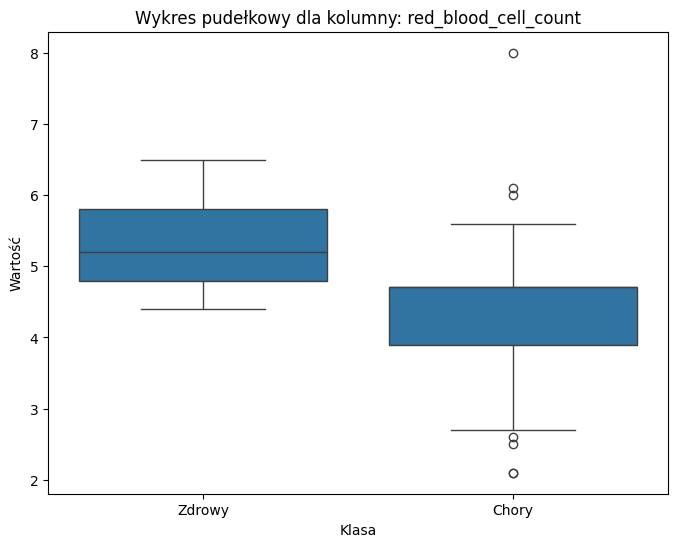

In [31]:
#wykresy histograficzne
for column in df.columns[:-1]:
    unique_values = df[column].unique()
    if len(unique_values) != 2 or set(unique_values) != {0, 1}:
        #Gęstość
        sns.kdeplot(df[column], color="steelblue") #linia trendu
        plt.hist(df[column], density=True, bins=5, color='lightblue') #słupki
        plt.xlabel('Wartości')
        plt.ylabel('Gęstość')
        plt.title('Wykres gęstości dla kolumny: ' + column)
        plt.show()
        #Wykres historiograficzny
        plt.figure(figsize=(8, 6))
        sns.histplot(df[column][df['classification'] == 1], color='red', label='Chory', kde=True, element="step", linewidth=0)
        sns.histplot(df[column][df['classification'] == 0], color='green', label='Zdrowy', kde=True, element="step", linewidth=0)
        plt.title('Wykres historiograficzny dla kolumny: ' + column)
        plt.xlabel('Wartość')
        plt.ylabel('Liczba przypadków')
        plt.legend()
        plt.show()
        # Ustawienie wielkości wykresu
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='classification', y=column, data=df)
        plt.xticks(ticks=[0, 1], labels=['Zdrowy', 'Chory'])
        plt.title('Wykres pudełkowy dla kolumny: ' + column)
        plt.xlabel('Klasa')
        plt.ylabel('Wartość')
        # Pokazanie wykresu
        plt.show()

In [32]:
#Podstawowe funkcje do normalizacji i standaryzacji
import random
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

class DataProc:
    def NormalizeMinMax(x): #Normalizacja
        x_copy = x.copy()
        for c in x_copy.iloc[:, :-1]:
            x_copy[c] = (x_copy[c] - x_copy[c].min()) / (x_copy[c].max() - x_copy[c].min())
        return x_copy
    def StandardizeZScore(x): #Standaryzacja
        x_copy = x.copy()
        for c in x_copy.iloc[:, :-1]:
            mean = x_copy[c].mean()
            std = x_copy[c].std()
            x_copy[c] = (x_copy[c] - mean) / std
        return x_copy

In [33]:
#moze sie jeszcze przydac
#for k in range(1, 6):
#    if weight == False:
#        knn_lib = KNeighborsClassifier(n_neighbors=k, metric=metric)
#    else:
#        knn_lib = KNeighborsClassifier(n_neighbors=k, metric=metric, weights='distance')
#    knn_lib.fit(X_train, y_train)
#    y_pred = knn_lib.predict(X_test)
#    res = knn_lib.score(X_test, y_test)
#    print("Dla k =", k, "dokładność wynosi:", res)

In [34]:
#Głowna funkcja do obslugi KNN z roznymi metrykami i cross_val, cv mozna potem zmienic na wieksze 
def evaluate_knn_with_metric(X, y, metric="euclidean", weight=False, cv=5):
    best_k = None
    best_accuracy = 0.0
    best_confusion_matrix = None
    best_std_score = 0.0
    scores = []
    k_values = [i for i in range(2,31)]
    for k in k_values:
        if weight == False:
            knn_lib = KNeighborsClassifier(n_neighbors=k, metric=metric)
        else:
            knn_lib = KNeighborsClassifier(n_neighbors=k, metric=metric, weights='distance')
        cv_score = cross_val_score(knn_lib, X, y, cv=cv)
        avg_score = np.mean(cv_score)
        std_score = cv_score.std()
        scores.append(avg_score)
        if avg_score > best_accuracy:
            best_accuracy = avg_score
            best_k = k
            best_confusion_matrix = confusion_matrix(y, cross_val_predict(knn_lib, X, y, cv=cv))
            best_std_score = std_score
    #Rysowanie wykresu
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=range(2, 31), y=scores, marker='o')
    plt.xlabel("K Values")
    plt.ylabel("Accuracy Score")
    plt.title("Accuracy Score vs. K Values ({} metric)".format(metric))
    plt.show()
    print("Dla metryki: {} najlepsze K to: {} dokładność wynosi dla niego: {:.2f} z odchyleniem standardowym {:.2f}".format(metric, best_k, round(best_accuracy, 2), round(best_std_score, 2)))
    return [metric, best_k, best_accuracy, best_confusion_matrix, best_std_score]
def split(df):
    df_copy = df.copy()
    y = df_copy.pop('classification')
    X = df_copy
    X_shuffled, y_shuffled = shuffle(X, y, random_state=42)
    return X_shuffled, y_shuffled
def plot_accuracy(scores):
    metrics = [item[0] + " k=" +  str(item[1]) for item in scores]
    accuracies = [item[2] for item in scores]
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(metrics, accuracies, color='skyblue')
    plt.xlabel('Metryka wraz z najlepszym K')
    plt.ylabel('Dokładność')
    plt.title('Dokładność dla różnych metryk i najlepszych dla nich wartości K')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    #Najlepsze opcje dla kazdego bedzie kolorowal na pomaranczowo
    best_accuracy = max(accuracies)
    for i, bar in enumerate(bars):
        if accuracies[i] == best_accuracy:
            bar.set_color('orange')
    plt.show()
def select_best(all_data):
    best_accuracy = 0.0
    best_data = None
    for data in all_data:
        accuracy = data[2]
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_data = data
    return best_data
def plot_confusion_matrix(data):
    metric_name, best_k, accuracy, confusion_matrix_data,std = data
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix_data, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title("Confusion Matrix - {} metric (Best K = {}, Accuracy = {:.2f})".format(metric_name, best_k, accuracy))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
def draw_summary_data_frame(data_dict):
    df = pd.DataFrame.from_dict(data_dict, orient='index', columns=['Metric', 'K', 'Accuracy', 'Confusion Matrix', 'Standard Deviation'])
    df['Accuracy'] = (df['Accuracy'] * 100).round(2).astype(str) + '%'
    df['Standard Deviation'] = (df['Standard Deviation'] * 100).round(2).astype(str) + '%'
    df.drop(columns=["Confusion Matrix","Metric","K"],inplace=True)
    df = df.sort_values(by=['Accuracy', 'Standard Deviation'], ascending=[False, True])  # Sortowanie względem Accuracy malejąco i po std rosnąco
    return df
    
metrics = ["euclidean", "chebyshev", "cosine", "canberra"]
knn_results = {}

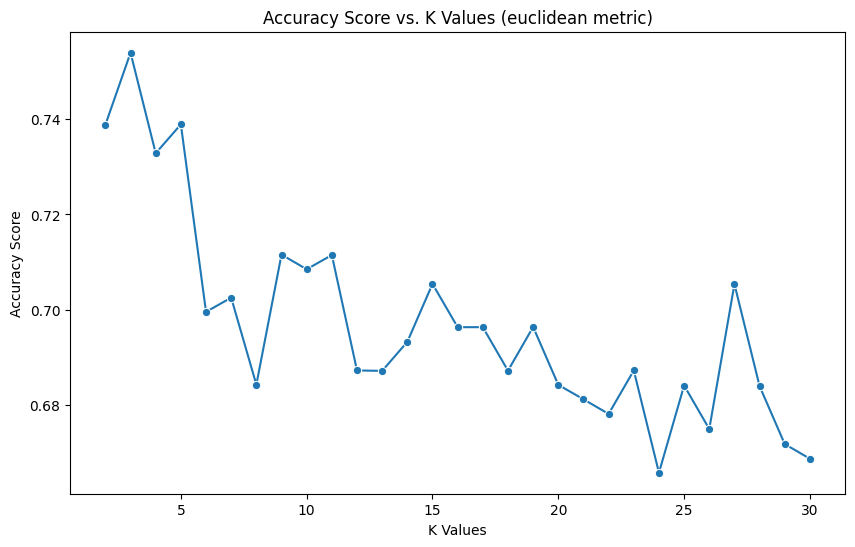

Dla metryki: euclidean najlepsze K to: 3 dokładność wynosi dla niego: 0.75 z odchyleniem standardowym 0.04


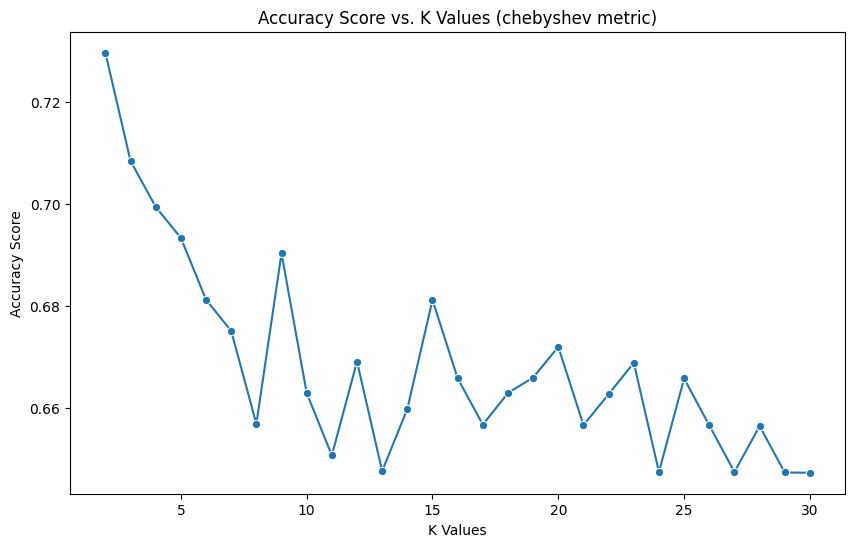

Dla metryki: chebyshev najlepsze K to: 2 dokładność wynosi dla niego: 0.73 z odchyleniem standardowym 0.02


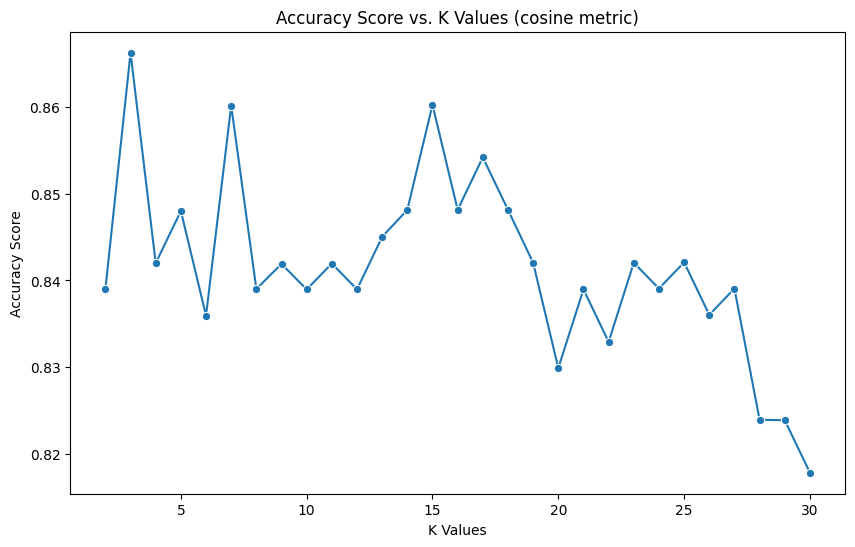

Dla metryki: cosine najlepsze K to: 3 dokładność wynosi dla niego: 0.87 z odchyleniem standardowym 0.02


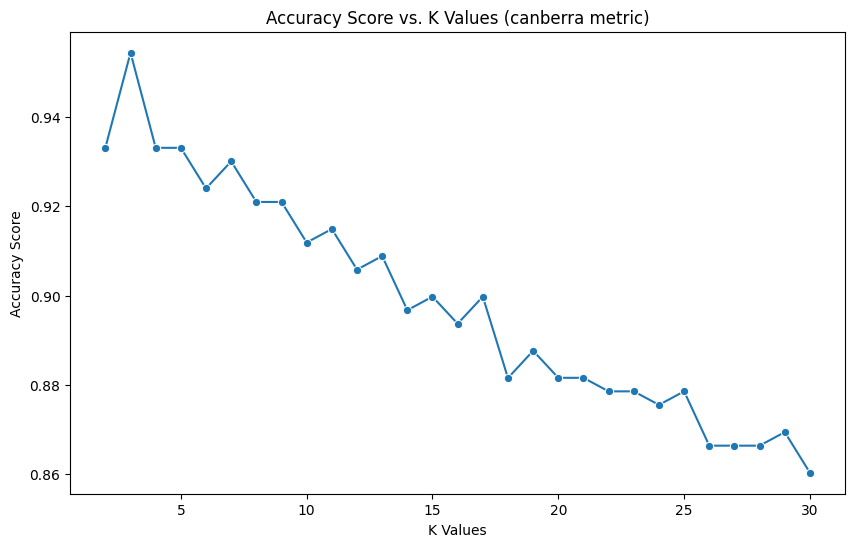

Dla metryki: canberra najlepsze K to: 3 dokładność wynosi dla niego: 0.95 z odchyleniem standardowym 0.02


In [35]:
#Dane nieznormalizowane testy dla roznych metryk
X, y = split(df)
all_data = []
for metric in metrics:
    res = evaluate_knn_with_metric(X, y, metric=metric)
    all_data.append(res)
    knn_results['KNN bez normalizacji ' + res[0] + " k=" + str(res[1])] = res

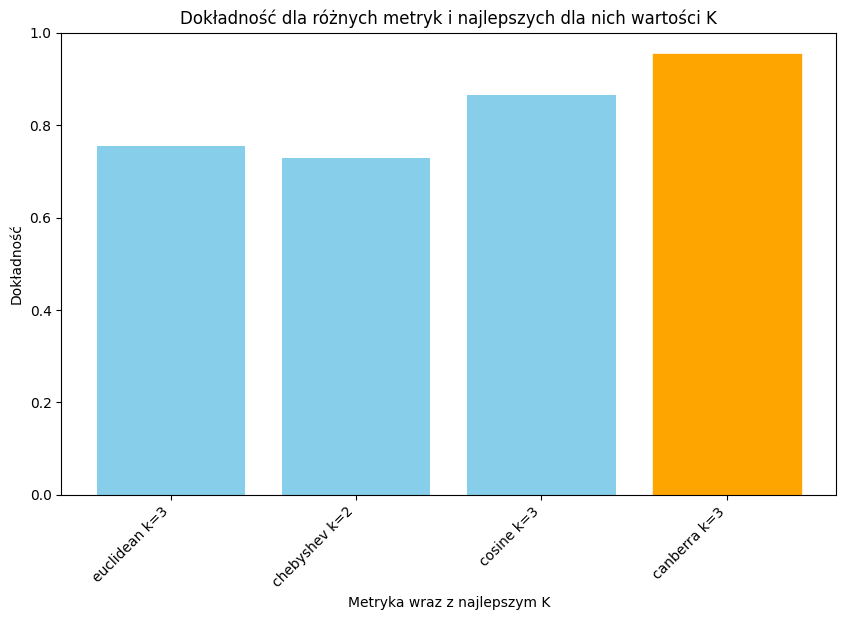

In [36]:
plot_accuracy(all_data)

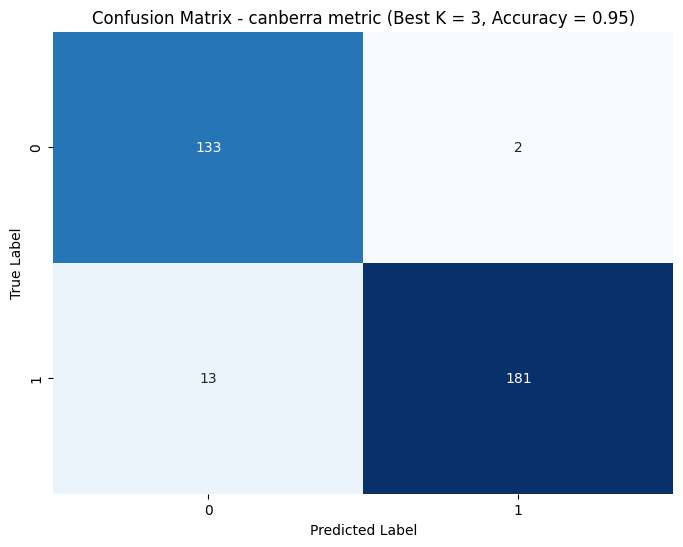

In [37]:
plot_confusion_matrix(select_best(all_data))

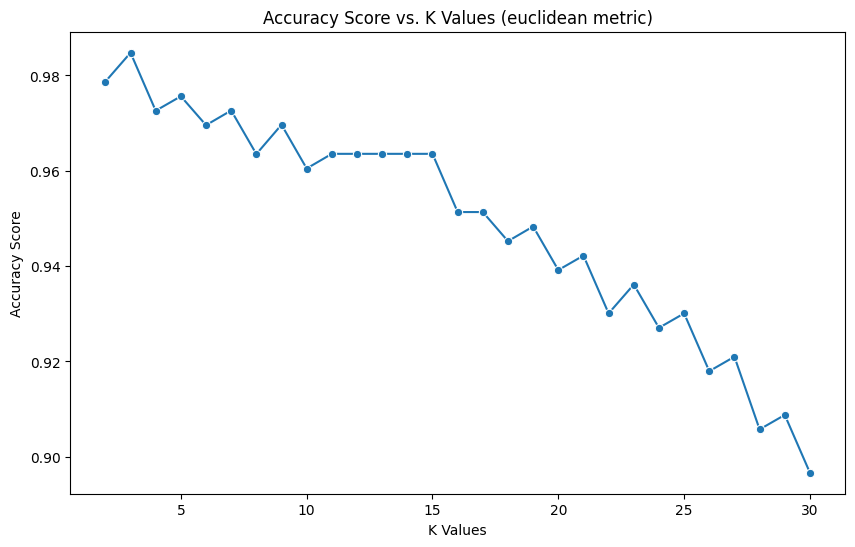

Dla metryki: euclidean najlepsze K to: 3 dokładność wynosi dla niego: 0.98 z odchyleniem standardowym 0.01


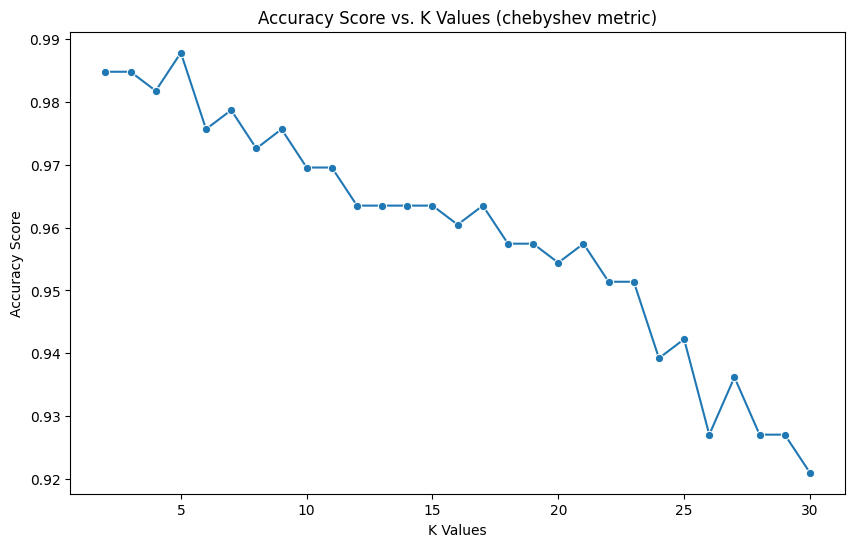

Dla metryki: chebyshev najlepsze K to: 5 dokładność wynosi dla niego: 0.99 z odchyleniem standardowym 0.01


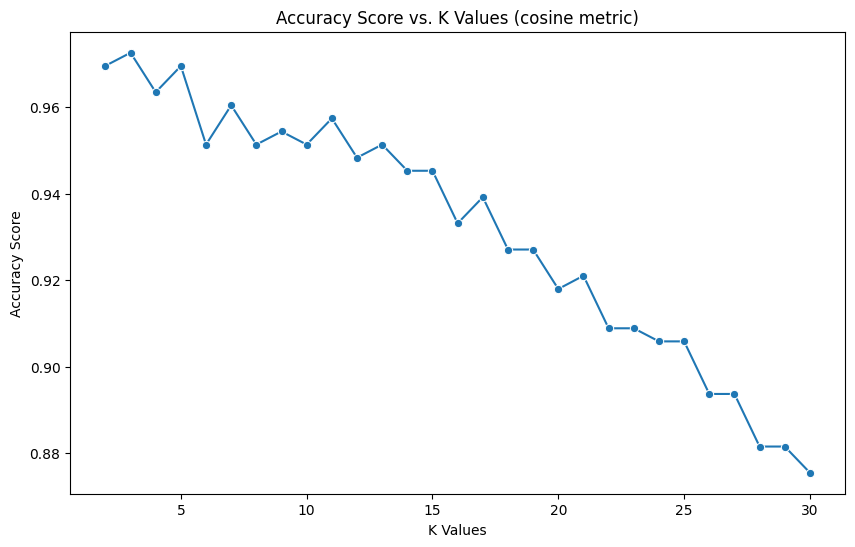

Dla metryki: cosine najlepsze K to: 3 dokładność wynosi dla niego: 0.97 z odchyleniem standardowym 0.01


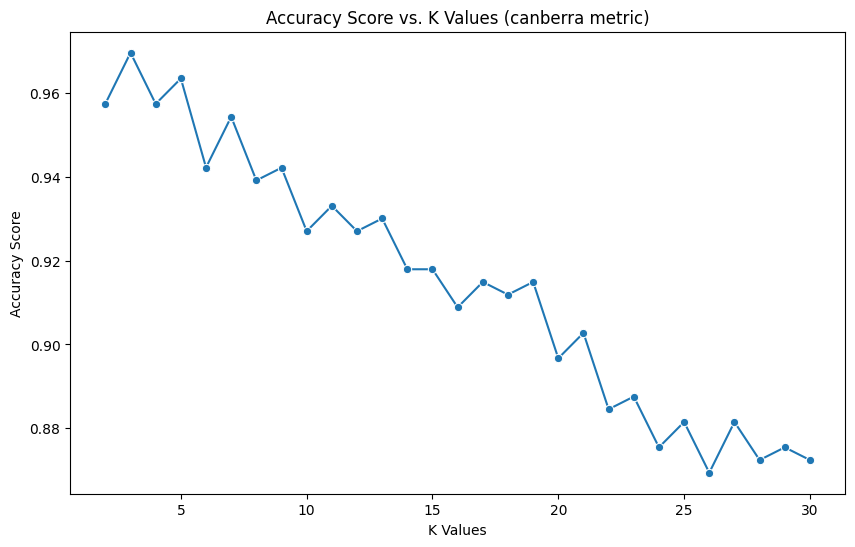

Dla metryki: canberra najlepsze K to: 3 dokładność wynosi dla niego: 0.97 z odchyleniem standardowym 0.02


In [38]:
#Dane znormalizowane min-max dla roznych metryk
df_norm = DataProc.NormalizeMinMax(df.copy())
X_norm, y_norm = split(df_norm)
all_data = []
for metric in metrics:
    res = evaluate_knn_with_metric(X_norm, y_norm, metric=metric)
    all_data.append(res)
    knn_results['KNN znormalizowany ' + res[0] + " k=" + str(res[1])] = res

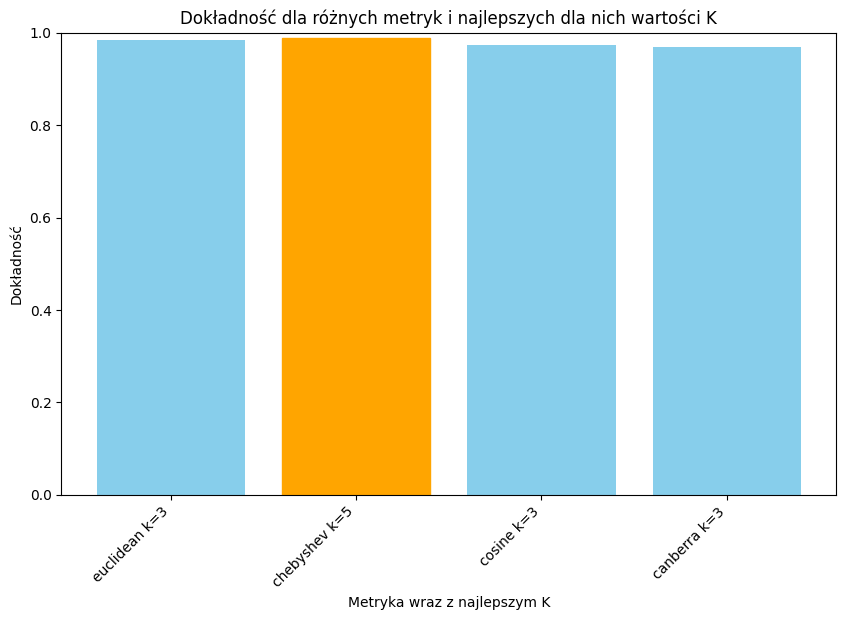

In [39]:
plot_accuracy(all_data)

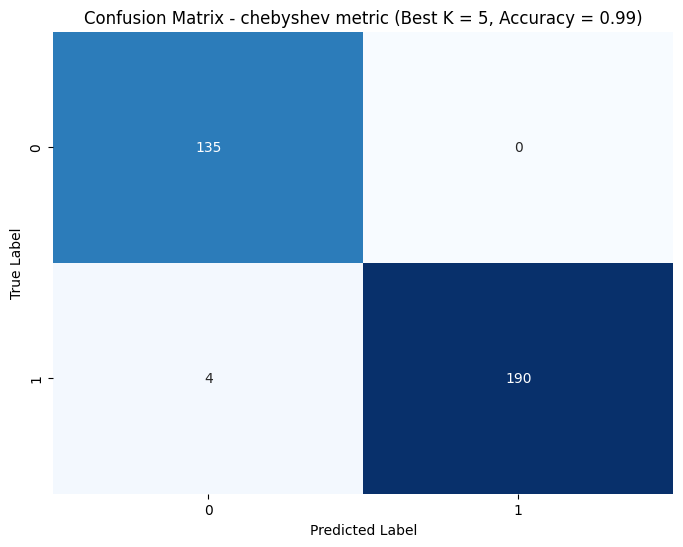

In [40]:
plot_confusion_matrix(select_best(all_data))

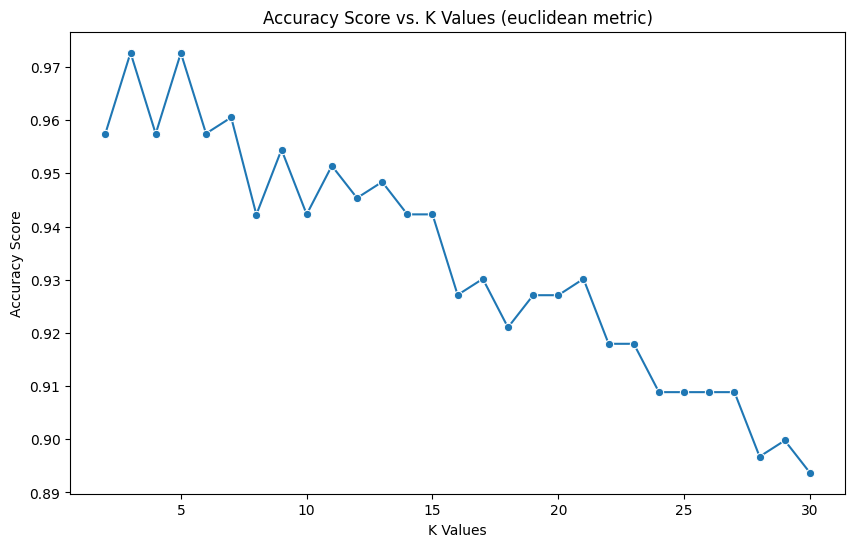

Dla metryki: euclidean najlepsze K to: 3 dokładność wynosi dla niego: 0.97 z odchyleniem standardowym 0.02


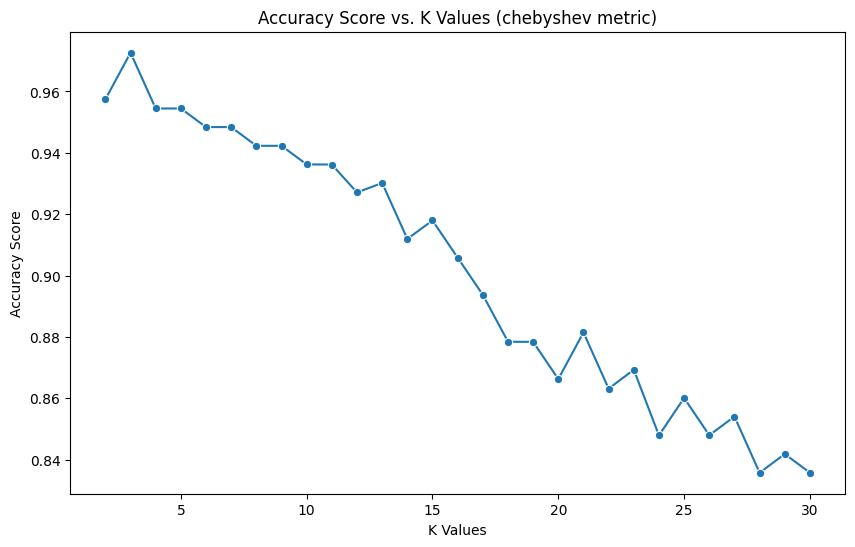

Dla metryki: chebyshev najlepsze K to: 3 dokładność wynosi dla niego: 0.97 z odchyleniem standardowym 0.01


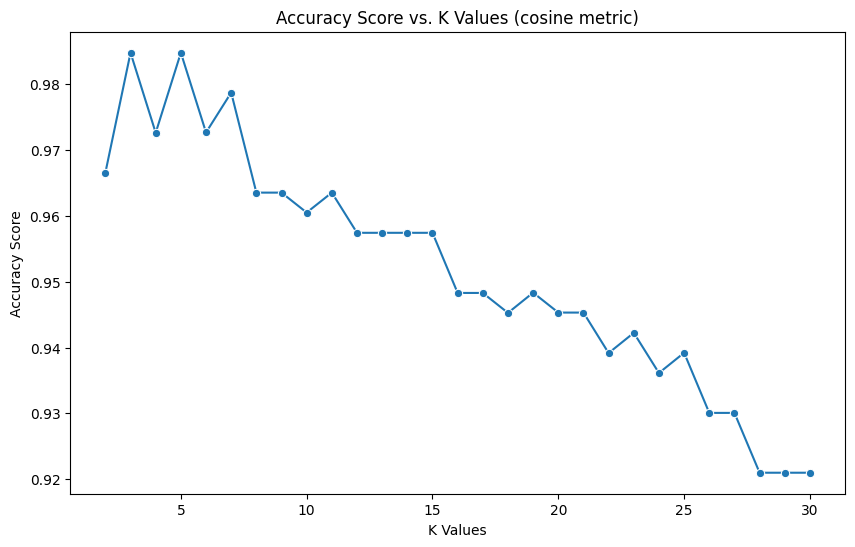

Dla metryki: cosine najlepsze K to: 3 dokładność wynosi dla niego: 0.98 z odchyleniem standardowym 0.02


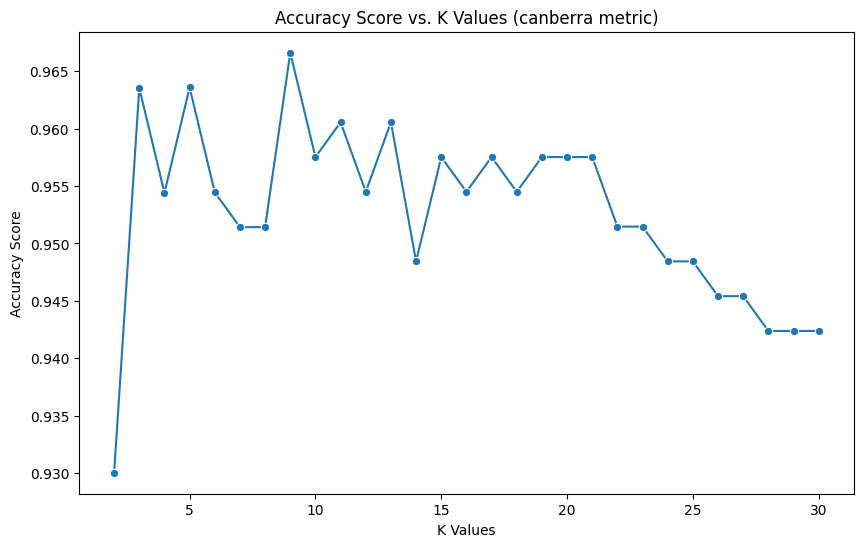

Dla metryki: canberra najlepsze K to: 9 dokładność wynosi dla niego: 0.97 z odchyleniem standardowym 0.02


In [41]:
#Dane ustandaryzowane (Z-score normalization) dla roznych metryk
df_stand = DataProc.StandardizeZScore(df.copy())
X_stand, y_stand = split(df_stand)
all_data = []
for metric in metrics:
    res =evaluate_knn_with_metric(X_stand, y_stand, metric=metric)
    all_data.append(res)
    knn_results['KNN ustandaryzowany ' + res[0] + " k=" + str(res[1])] = res

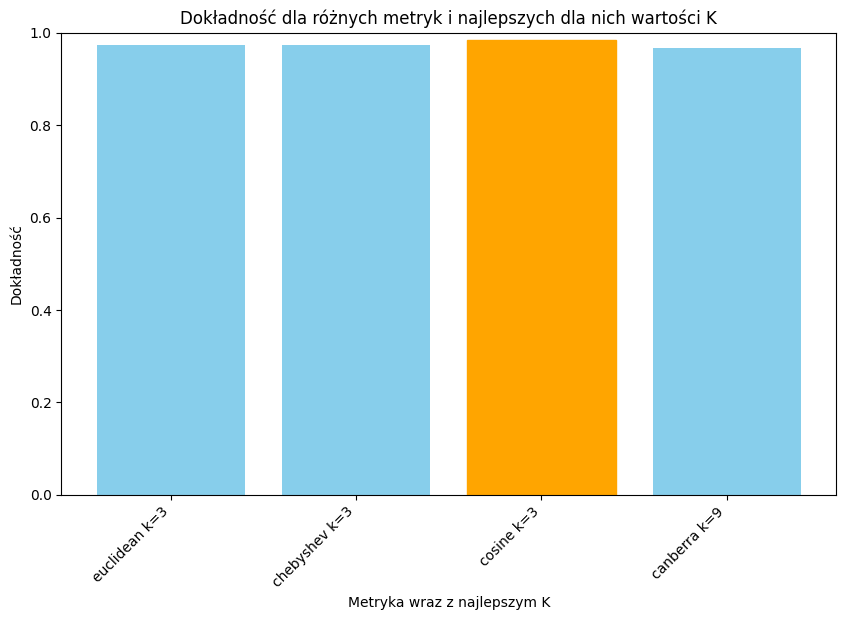

In [42]:
plot_accuracy(all_data)

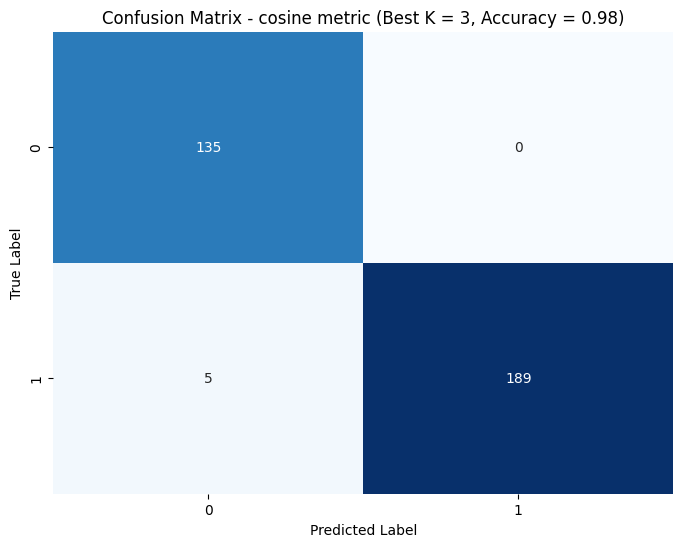

In [43]:
plot_confusion_matrix(select_best(all_data))

In [44]:
#Przy okazji sprawdzam czy standaryzacja dziala ok, jak widac tak bo średnia jest dla kazdej kolumny bliska 0, a odchylenie 1
df_stand.describe()

age  blood_pressure  specific_gravity       albumin       sugar  \
count  329.000000    3.290000e+02      3.290000e+02  3.290000e+02  329.000000   
mean     0.000000    3.671497e-16     -8.077294e-15 -8.638817e-17    0.000000   
std      1.000000    1.000000e+00      1.000000e+00  1.000000e+00    1.000000   
min     -2.807669   -1.959214e+00     -2.171484e+00 -7.567025e-01   -0.400404   
25%     -0.542705   -4.738004e-01     -1.297519e+00 -7.567025e-01   -0.400404   
50%      0.096131    2.689062e-01      4.504114e-01 -7.567025e-01   -0.400404   
75%      0.734968    2.689062e-01      4.504114e-01  7.032271e-01   -0.400404   
max      2.303020    7.695972e+00      1.324377e+00  2.893122e+00    4.311052   

           pus_cell  pus_cell_clumps      bacteria  blood_glucose_random  \
count  3.290000e+02       329.000000  3.290000e+02          3.290000e+02   
mean   2.159704e-17         0.000000 -3.239557e-17         -2.591645e-16   
std    1.000000e+00         1.000000  1.000000e+00          1.000000e+00   
min   -5.472497e-01        -0.376734 -2.607193e-01         -1.680011e+00   
25%   -5.472497e-01        -0.376734 -2.607193e-01         -6.114122e-01   
50%   -5.472497e-01        -0.376734 -2.607193e-01         -2.774750e-01   
75%   -5.472497e-01        -0.376734 -2.607193e-01          3.520021e-03   
max    1.821765e+00         2.646326  3.823884e+00          4.571293e+00   

         blood_urea  ...  packed_cell_volume  white_blood_cell_count  \
count  3.290000e+02  ...        3.290000e+02            3.290000e+02   
mean  -1.079852e-16  ...        2.591645e-16            4.103438e-16   
std    1.000000e+00  ...        1.000000e+00            1.000000e+00   
min   -1.093598e+00  ...       -3.693358e+00           -2.316449e+00   
25%   -5.904614e-01  ...       -6.361442e-01           -5.983433e-01   
50%   -2.618824e-01  ...       -3.882603e-02            1.545346e-03   
75%    5.490320e-02  ...        7.090297e-01            3.727598e-01   
max    6.905248e+00  ...        1.809627e+00            6.722280e+00   

       red_blood_cell_count  hypertension  diabetes_mellitus  \
count          3.290000e+02  3.290000e+02       3.290000e+02   
mean           1.295823e-16 -4.319409e-17       1.295823e-16   
std            1.000000e+00  1.000000e+00       1.000000e+00   
min           -3.134329e+00 -7.028148e-01      -6.409094e-01   
25%           -2.706337e-01 -7.028148e-01      -6.409094e-01   
50%           -2.312098e-02 -7.028148e-01      -6.409094e-01   
75%            5.646109e-01  1.418525e+00       1.555540e+00   
max            3.905589e+00  1.418525e+00       1.555540e+00   

       coronary_artery_disease      appetite    peda_edema       aanemia  \
count             3.290000e+02  3.290000e+02  3.290000e+02  3.290000e+02   
mean              5.399261e-17 -1.727763e-16  2.159704e-17 -2.159704e-17   
std               1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min              -2.924855e-01 -1.974478e+00 -4.715616e-01 -3.974533e-01   
25%              -2.924855e-01  5.049237e-01 -4.715616e-01 -3.974533e-01   
50%              -2.924855e-01  5.049237e-01 -4.715616e-01 -3.974533e-01   
75%              -2.924855e-01  5.049237e-01 -4.715616e-01 -3.974533e-01   
max               3.408581e+00  5.049237e-01  2.114168e+00  2.508372e+00   

       classification  
count      329.000000  
mean         0.589666  
std          0.492644  
min          0.000000  
25%          0.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  

[8 rows x 24 columns]

In [45]:
#Dla normalizacji podobnie tylko tym razem wartosci min max są w przedziale 0 do 1
df_norm.describe()

age  blood_pressure  specific_gravity     albumin       sugar  \
count  329.000000      329.000000        329.000000  329.000000  329.000000   
mean     0.549372        0.202918          0.621159    0.207326    0.084985   
std      0.195668        0.103571          0.286053    0.273986    0.212249   
min      0.000000        0.000000          0.000000    0.000000    0.000000   
25%      0.443182        0.153846          0.250000    0.000000    0.000000   
50%      0.568182        0.230769          0.750000    0.000000    0.000000   
75%      0.693182        0.230769          0.750000    0.400000    0.000000   
max      1.000000        1.000000          1.000000    1.000000    1.000000   

         pus_cell  pus_cell_clumps    bacteria  blood_glucose_random  \
count  329.000000       329.000000  329.000000            329.000000   
mean     0.231003         0.124620    0.063830              0.268746   
std      0.422116         0.330791    0.244822              0.159967   
min      0.000000         0.000000    0.000000              0.000000   
25%      0.000000         0.000000    0.000000              0.170940   
50%      0.000000         0.000000    0.000000              0.224359   
75%      0.000000         0.000000    0.000000              0.269309   
max      1.000000         1.000000    1.000000              1.000000   

       blood_urea  ...  packed_cell_volume  white_blood_cell_count  \
count  329.000000  ...          329.000000              329.000000   
mean     0.136719  ...            0.671155                0.256280   
std      0.125018  ...            0.181720                0.110635   
min      0.000000  ...            0.000000                0.000000   
25%      0.062901  ...            0.555556                0.190083   
50%      0.103979  ...            0.664100                0.256451   
75%      0.143583  ...            0.800000                0.297521   
max      1.000000  ...            1.000000                1.000000   

       red_blood_cell_count  hypertension  diabetes_mellitus  \
count            329.000000    329.000000         329.000000   
mean               0.445222      0.331307           0.291793   
std                0.142047      0.471400           0.455280   
min                0.000000      0.000000           0.000000   
25%                0.406780      0.000000           0.000000   
50%                0.441938      0.000000           0.000000   
75%                0.525424      1.000000           1.000000   
max                1.000000      1.000000           1.000000   

       coronary_artery_disease    appetite  peda_edema     aanemia  \
count               329.000000  329.000000  329.000000  329.000000   
mean                  0.079027    0.796353    0.182371    0.136778   
std                   0.270192    0.403323    0.386738    0.344136   
min                   0.000000    0.000000    0.000000    0.000000   
25%                   0.000000    1.000000    0.000000    0.000000   
50%                   0.000000    1.000000    0.000000    0.000000   
75%                   0.000000    1.000000    0.000000    0.000000   
max                   1.000000    1.000000    1.000000    1.000000   

       classification  
count      329.000000  
mean         0.589666  
std          0.492644  
min          0.000000  
25%          0.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  

[8 rows x 24 columns]

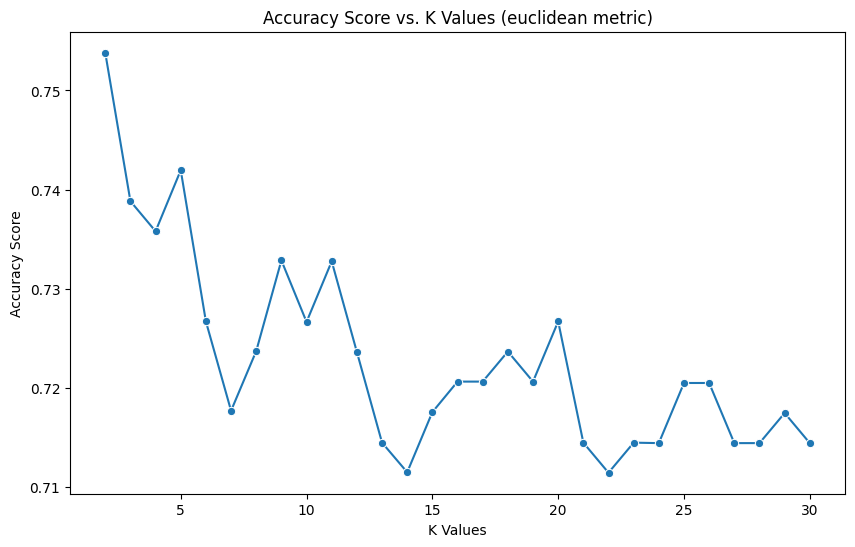

Dla metryki: euclidean najlepsze K to: 2 dokładność wynosi dla niego: 0.75 z odchyleniem standardowym 0.05


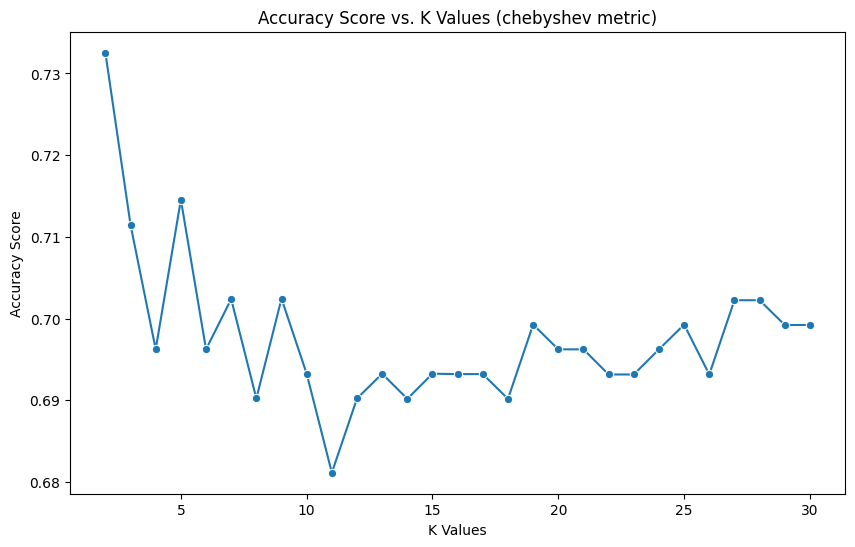

Dla metryki: chebyshev najlepsze K to: 2 dokładność wynosi dla niego: 0.73 z odchyleniem standardowym 0.03


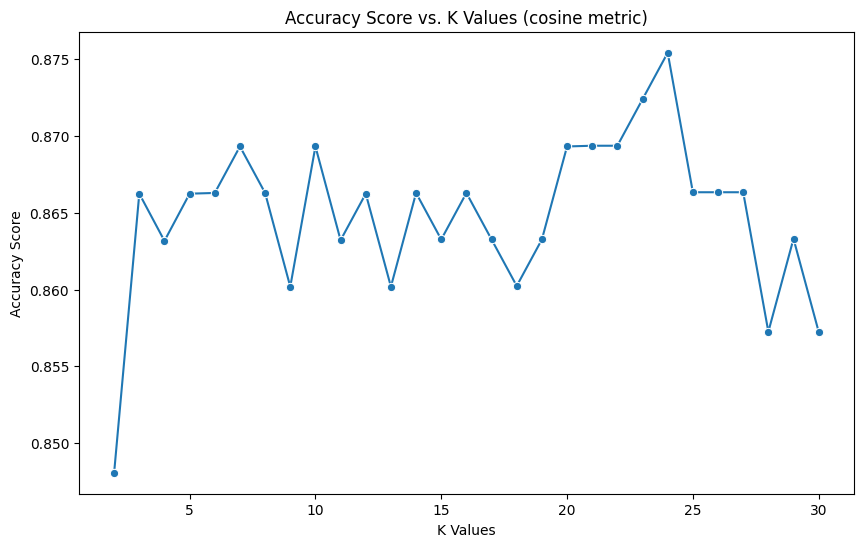

Dla metryki: cosine najlepsze K to: 24 dokładność wynosi dla niego: 0.88 z odchyleniem standardowym 0.02


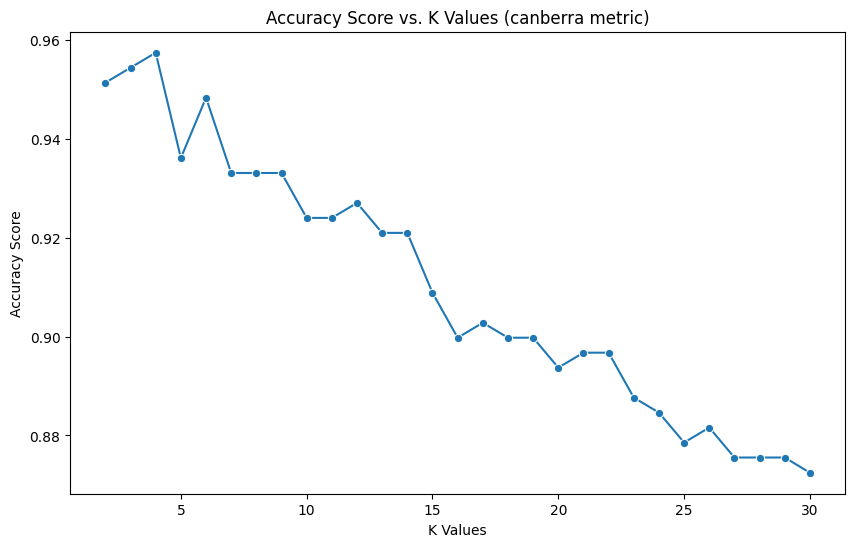

Dla metryki: canberra najlepsze K to: 4 dokładność wynosi dla niego: 0.96 z odchyleniem standardowym 0.03


In [46]:
#Tutaj z uwzglednieniem wag: ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of 
#a query point will have a greater influence than neighbors which are further away.
#Dane nieznormalizowane testy dla roznych metryk
all_data = []
for metric in metrics:
    res = evaluate_knn_with_metric(X, y, metric=metric, weight=True)
    all_data.append(res)
    knn_results['KNN bez normalizacji z wagami ' + res[0] + " k=" + str(res[1])] = res

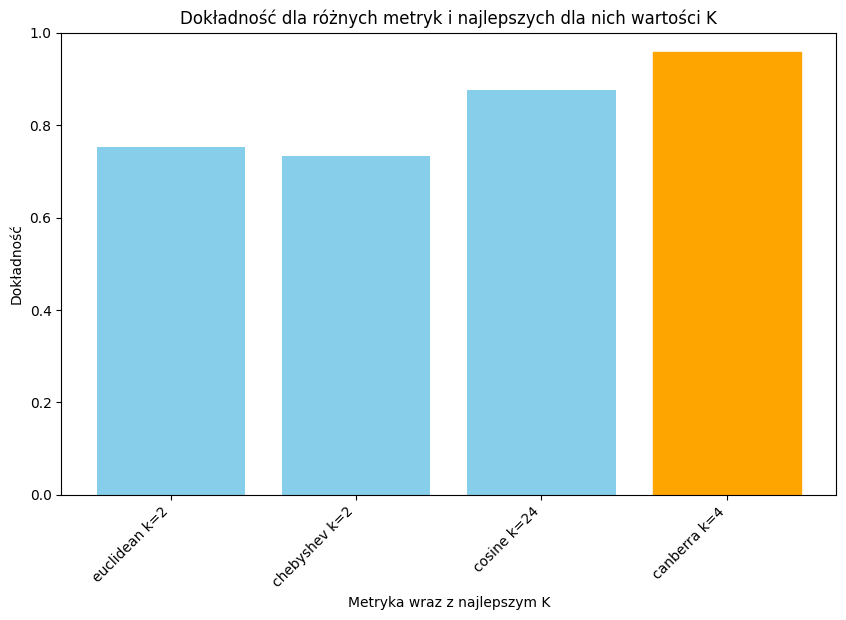

In [47]:
plot_accuracy(all_data)

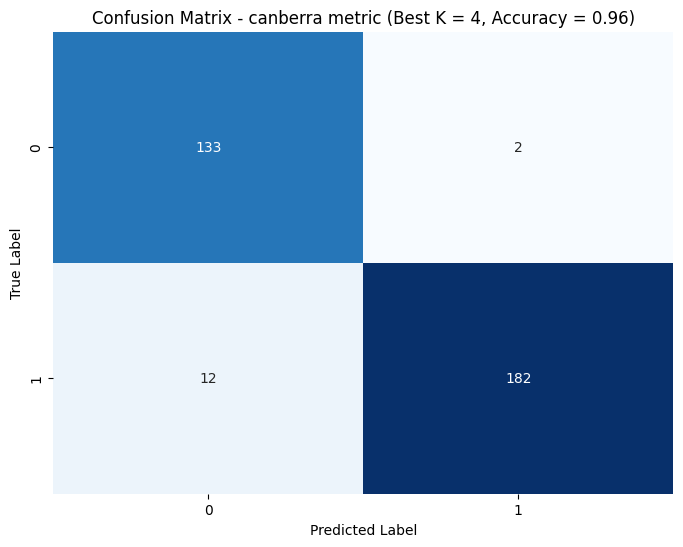

In [48]:
plot_confusion_matrix(select_best(all_data))

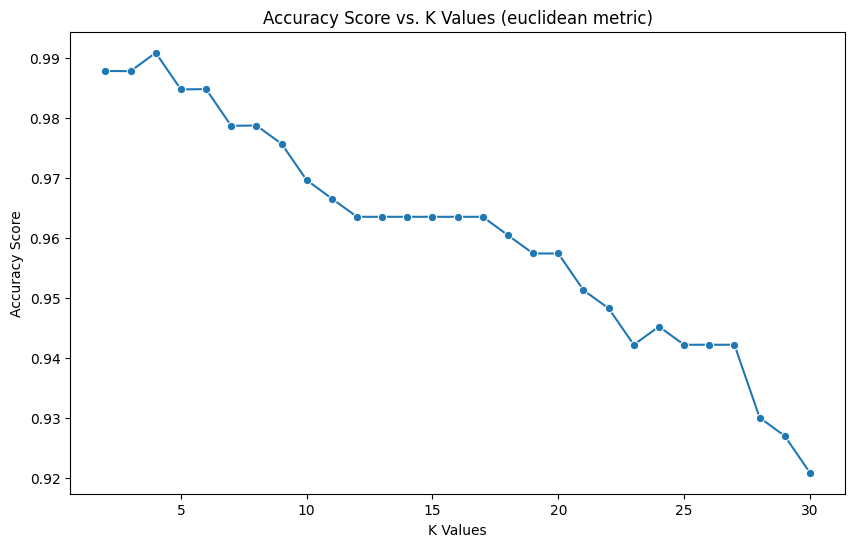

Dla metryki: euclidean najlepsze K to: 4 dokładność wynosi dla niego: 0.99 z odchyleniem standardowym 0.01


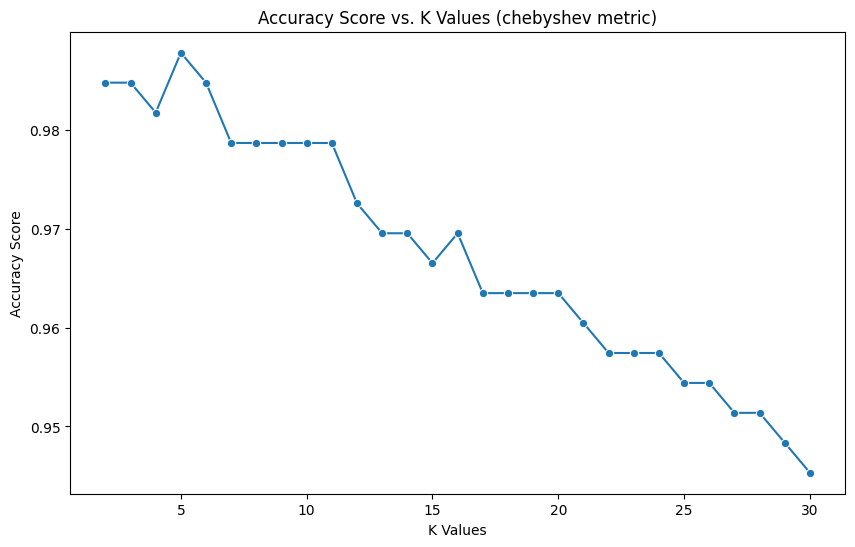

Dla metryki: chebyshev najlepsze K to: 5 dokładność wynosi dla niego: 0.99 z odchyleniem standardowym 0.01


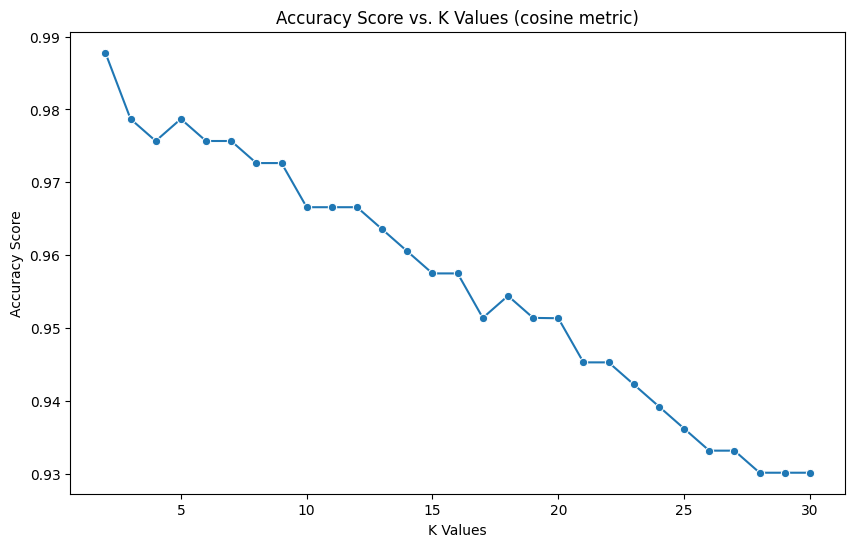

Dla metryki: cosine najlepsze K to: 2 dokładność wynosi dla niego: 0.99 z odchyleniem standardowym 0.01


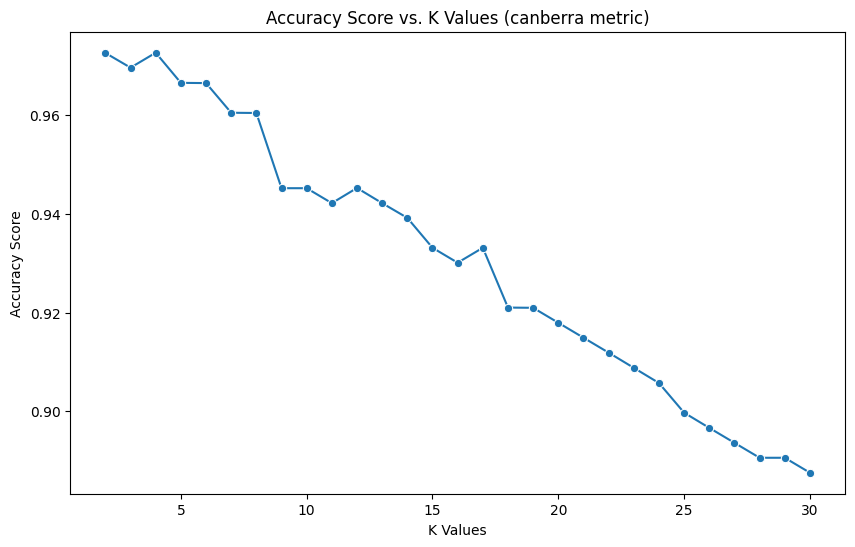

Dla metryki: canberra najlepsze K to: 4 dokładność wynosi dla niego: 0.97 z odchyleniem standardowym 0.02


In [49]:
#Wagi cd ale tym razem 
##Dane znormalizowane dla roznych metryk k
all_data = []
for metric in metrics:
    res = evaluate_knn_with_metric(X_norm, y_norm, metric=metric, weight=True)
    all_data.append(res)
    knn_results['KNN znormalizowany z wagami ' + res[0] + " k=" + str(res[1])] = res

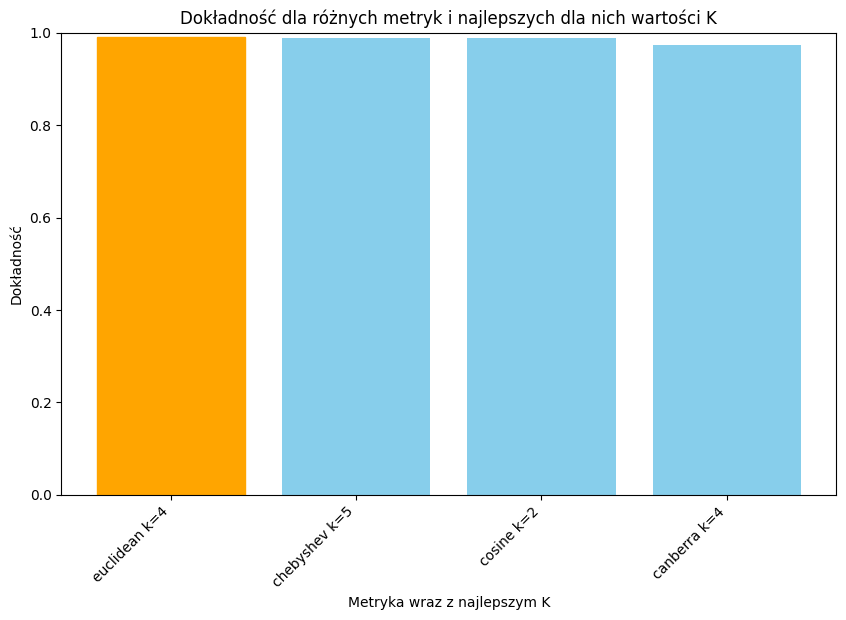

In [50]:
plot_accuracy(all_data)

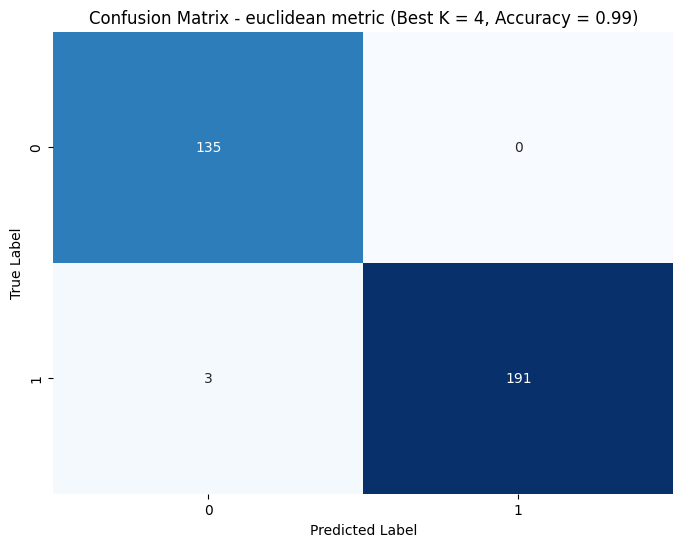

In [51]:
plot_confusion_matrix(select_best(all_data))

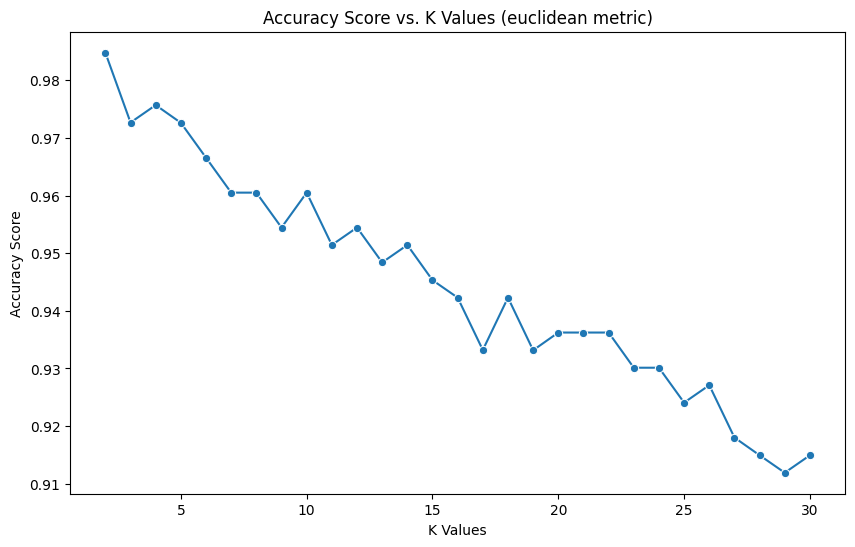

Dla metryki: euclidean najlepsze K to: 2 dokładność wynosi dla niego: 0.98 z odchyleniem standardowym 0.01


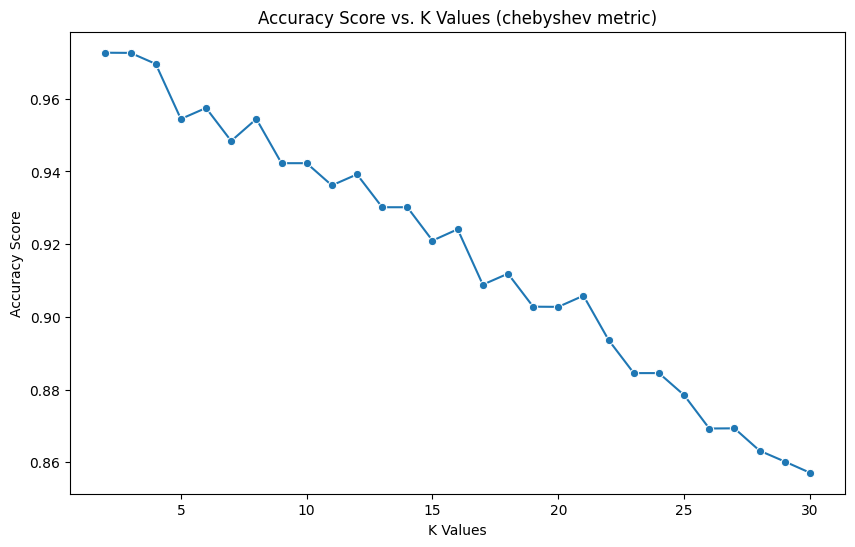

Dla metryki: chebyshev najlepsze K to: 2 dokładność wynosi dla niego: 0.97 z odchyleniem standardowym 0.01


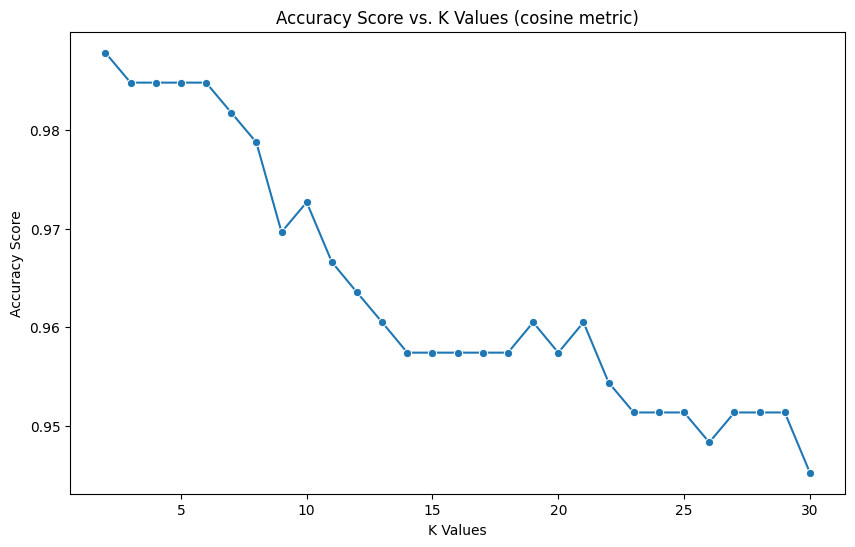

Dla metryki: cosine najlepsze K to: 2 dokładność wynosi dla niego: 0.99 z odchyleniem standardowym 0.01


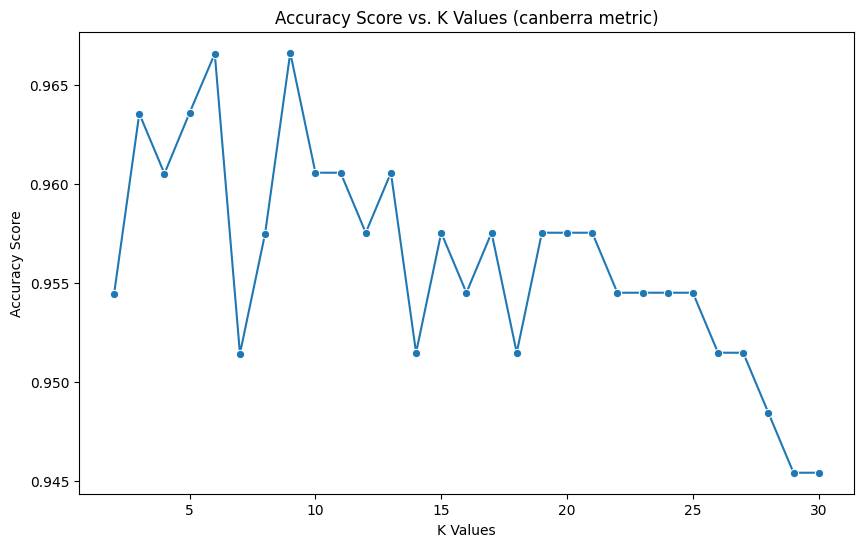

Dla metryki: canberra najlepsze K to: 9 dokładność wynosi dla niego: 0.97 z odchyleniem standardowym 0.02


In [52]:
#I wagi dla danych ustandaryzowanych
all_data = []
for metric in metrics:
    res = evaluate_knn_with_metric(X_stand, y_stand, metric=metric, weight=True)
    all_data.append(res)
    knn_results['KNN ustandaryzowany z wagami ' + res[0] + " k=" + str(res[1])] = res

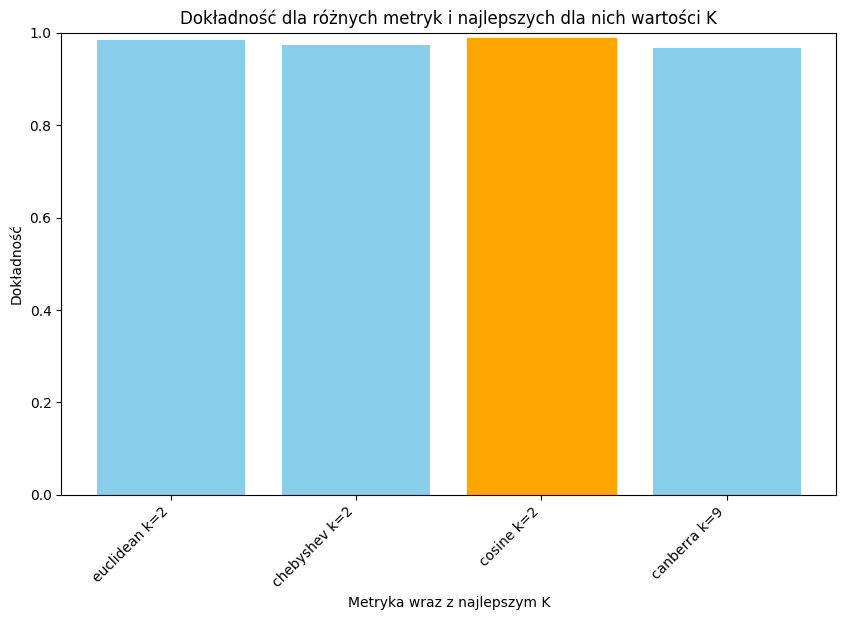

In [53]:
plot_accuracy(all_data)

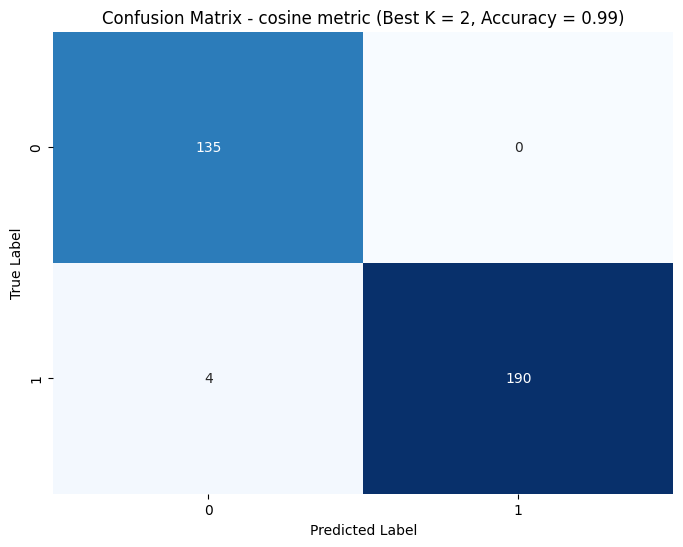

In [54]:
plot_confusion_matrix(select_best(all_data))

In [55]:
#Dokumentacja KNN https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
#Tutaj wzory są opisane te które uzywam w KNN https://docs.scipy.org/doc/scipy/reference/spatial.distance.html

In [56]:
#Jakies testy PCA source: https://ichi.pro/pl/analiza-glownych-komponentow-pca-ze-scikit-learn-33554981925296
#najpierw dla danych znormalizowanych min-max
from sklearn.decomposition import PCA
df_copy = df_norm.copy()
y = df_copy.pop('classification')
X = df_copy
pca_23 = PCA(n_components=23, random_state=42)
pca_23.fit(X)
X_pca_23 = pca_23.transform(X)
cumulative_variance = np.cumsum(pca_23.explained_variance_ratio_ * 100)
for i, variance in enumerate(reversed(cumulative_variance)):
    print(f'Redukcja z 23 wymiarów do {len(cumulative_variance)-i} zachowała {variance:.2f}% wariancji.')

Redukcja z 23 wymiarów do 23 zachowała 100.00% wariancji.
Redukcja z 23 wymiarów do 22 zachowała 99.87% wariancji.
Redukcja z 23 wymiarów do 21 zachowała 99.68% wariancji.
Redukcja z 23 wymiarów do 20 zachowała 99.43% wariancji.
Redukcja z 23 wymiarów do 19 zachowała 99.03% wariancji.
Redukcja z 23 wymiarów do 18 zachowała 98.58% wariancji.
Redukcja z 23 wymiarów do 17 zachowała 98.08% wariancji.
Redukcja z 23 wymiarów do 16 zachowała 97.49% wariancji.
Redukcja z 23 wymiarów do 15 zachowała 96.85% wariancji.
Redukcja z 23 wymiarów do 14 zachowała 95.97% wariancji.
Redukcja z 23 wymiarów do 13 zachowała 94.85% wariancji.
Redukcja z 23 wymiarów do 12 zachowała 93.37% wariancji.
Redukcja z 23 wymiarów do 11 zachowała 91.37% wariancji.
Redukcja z 23 wymiarów do 10 zachowała 89.33% wariancji.
Redukcja z 23 wymiarów do 9 zachowała 86.62% wariancji.
Redukcja z 23 wymiarów do 8 zachowała 83.29% wariancji.
Redukcja z 23 wymiarów do 7 zachowała 79.73% wariancji.
Redukcja z 23 wymiarów do 6 zacho

Text(0, 0.5, 'Explained variance')

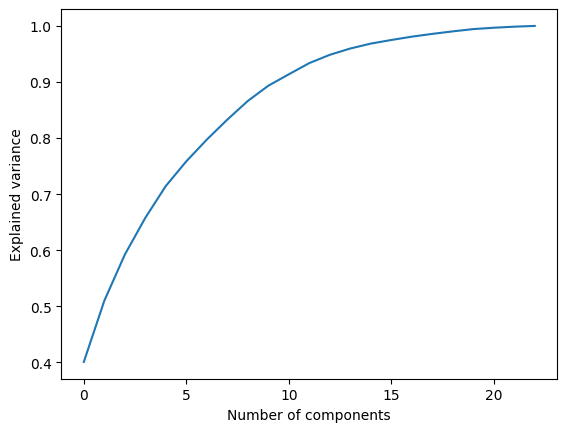

In [57]:
plt.plot(np.cumsum(pca_23.explained_variance_ratio_ ))
plt.xlabel("Number of components")
plt.ylabel("Explained variance")

In [58]:
pca_14 = PCA(n_components=14, random_state=42)
pca_14.fit(X)
#X_pca_14 = pca_14.transform(X)
X_PCA14 = pd.DataFrame(pca_14.transform(X), columns=[f'PCA{i}' for i in range(1, 15)], index=X.index) #To ostatnei do zachowania indexów
X_PCA14

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0    0.234450 -0.870987  0.205788  0.096908  0.154607 -0.181351 -0.295148   
1   -0.471856  0.189408  0.015336 -0.011992  0.110929  0.139795  0.231926   
2    0.692400 -0.298192 -0.426655  0.385666 -0.770235  1.067159  0.071635   
3    1.592575  1.139100 -0.378190  0.377924  0.008327 -0.165901 -0.066394   
4   -0.407018  0.096374  0.058972  0.035065  0.068073  0.237427  0.288174   
..        ...       ...       ...       ...       ...       ...       ...   
395 -0.705999 -0.016249  0.008842 -0.026248 -0.014975 -0.024605 -0.021512   
396 -0.840208 -0.006991 -0.033056 -0.062366 -0.017904 -0.137714 -0.125494   
397 -0.766190  0.043564 -0.028739 -0.030185  0.013566  0.045998 -0.021496   
398 -0.805229  0.035858 -0.048274 -0.030189  0.006184 -0.054600 -0.089004   
399 -0.800065 -0.037190 -0.009703 -0.055002 -0.034361 -0.149965 -0.121129   

         PCA8      PCA9     PCA10     PCA11     PCA12     PCA13     PCA14  
0   -0.063744  0.063697 -0.256742 -0.057411 -0.242126 -0.077416 -0.157038  
1   -0.124658  0.080801 -0.239872  0.638693 -0.408963  0.125915 -0.036476  
2    0.222040  0.023227 -0.087774  0.184152  0.355015  0.117073 -0.160995  
3   -0.461768 -0.449849  0.121161  0.216177  0.121994 -0.198514 -0.377963  
4   -0.361521  0.099693  0.208765  0.114411 -0.057820  0.184507 -0.051861  
..        ...       ...       ...       ...       ...       ...       ...  
395  0.030931 -0.017509  0.036233 -0.072368  0.108531  0.036532 -0.040325  
396  0.162945 -0.063588 -0.146589 -0.001217  0.002703 -0.038473 -0.124631  
397  0.015404  0.012389 -0.057372  0.134980 -0.144354 -0.294970 -0.018238  
398  0.156247 -0.032619 -0.168078  0.147695 -0.161186 -0.195505  0.030579  
399  0.169600 -0.064943 -0.109079 -0.052641  0.120161  0.066508 -0.131949  

[329 rows x 14 columns]

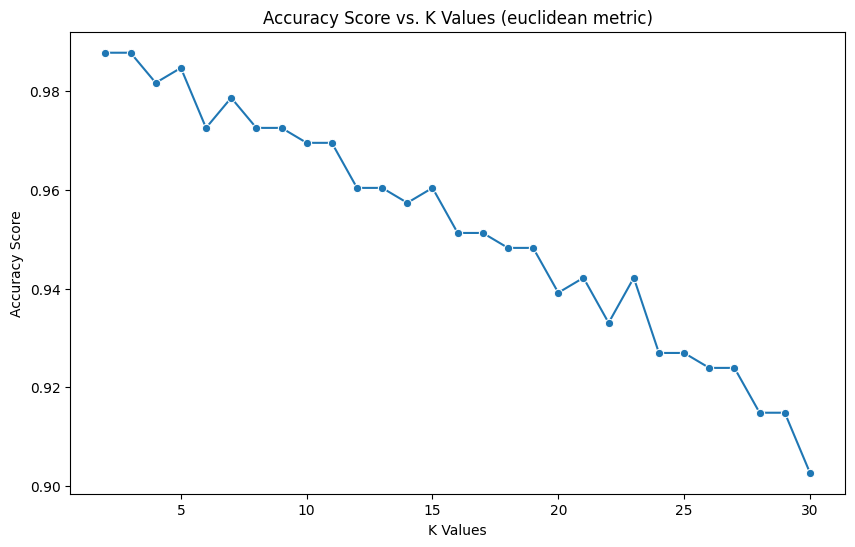

Dla metryki: euclidean najlepsze K to: 2 dokładność wynosi dla niego: 0.99 z odchyleniem standardowym 0.02


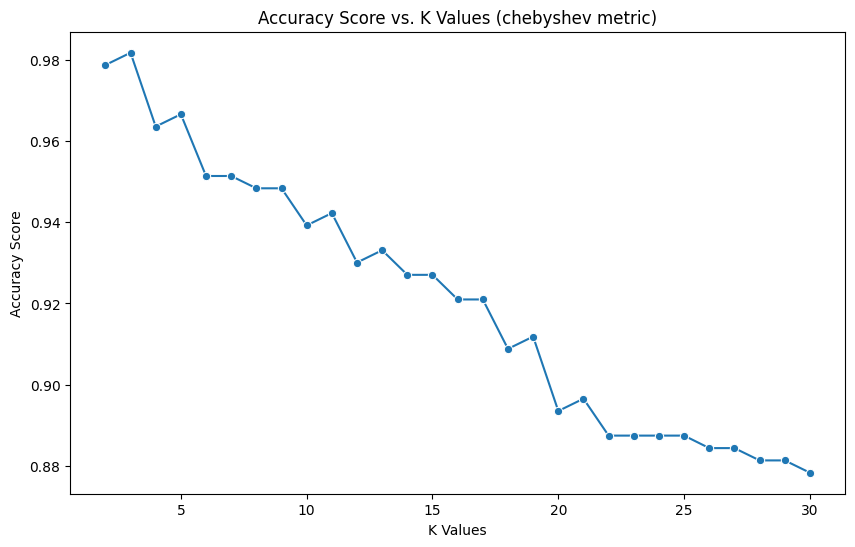

Dla metryki: chebyshev najlepsze K to: 3 dokładność wynosi dla niego: 0.98 z odchyleniem standardowym 0.02


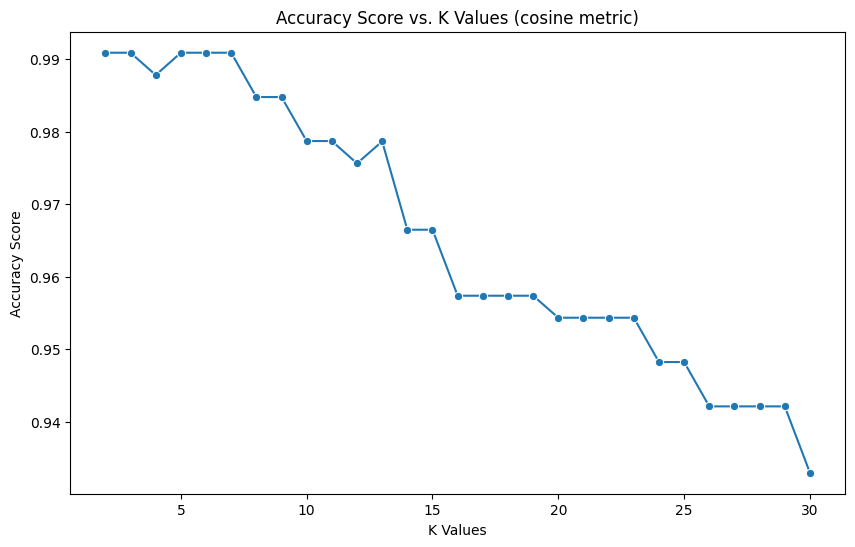

Dla metryki: cosine najlepsze K to: 2 dokładność wynosi dla niego: 0.99 z odchyleniem standardowym 0.01


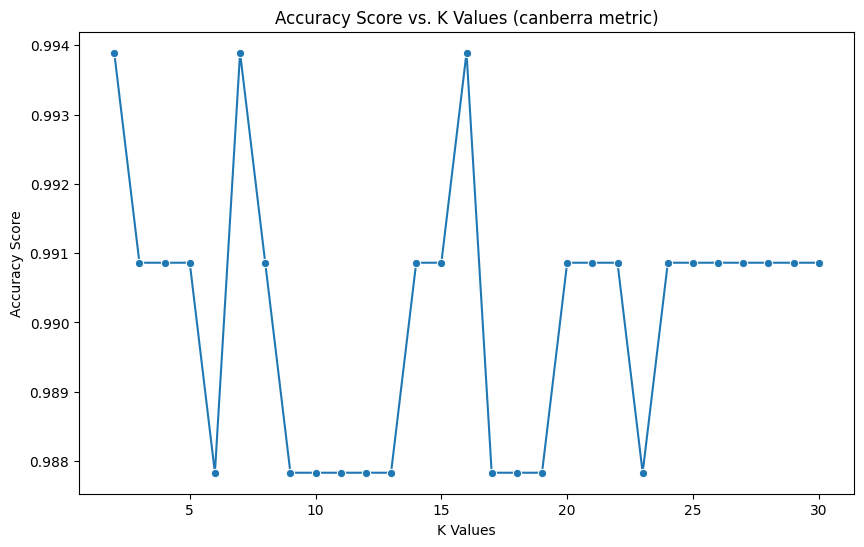

Dla metryki: canberra najlepsze K to: 2 dokładność wynosi dla niego: 0.99 z odchyleniem standardowym 0.01


In [59]:
#Testy dla PCA14 dane znormalizowane
all_data = []
for metric in metrics:
    res = evaluate_knn_with_metric(X_PCA14, y, metric=metric)
    all_data.append(res)
    knn_results['KNN PCA14 znormalizowany ' + res[0] + " k=" + str(res[1])] = res

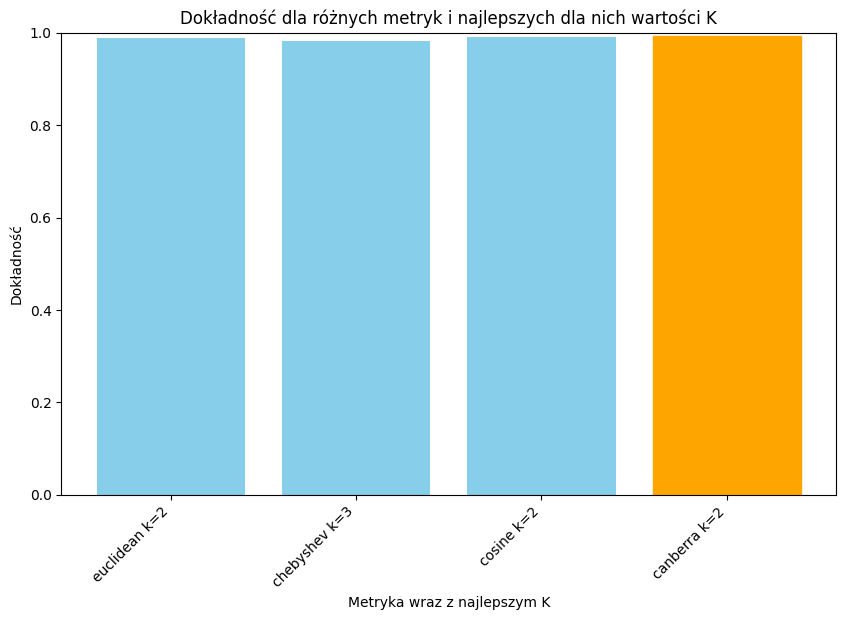

In [60]:
plot_accuracy(all_data)

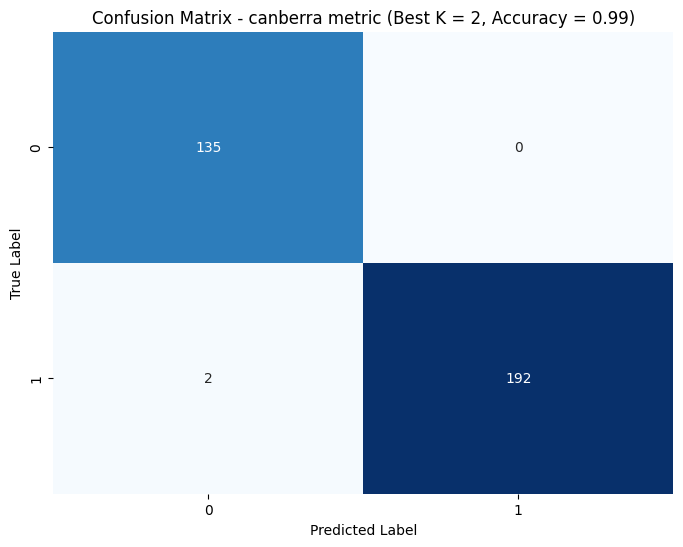

In [61]:
plot_confusion_matrix(select_best(all_data))

In [62]:
#PCA dla danych ustandaryzowanych
df_copy = df_stand.copy()
y = df_copy.pop('classification')
X = df_copy
pca_23 = PCA(n_components=23, random_state=42)
pca_23.fit(X)
X_pca_23 = pca_23.transform(X)
cumulative_variance = np.cumsum(pca_23.explained_variance_ratio_ * 100)
for i, variance in enumerate(reversed(cumulative_variance)):
    print(f'Redukcja z 23 wymiarów do {len(cumulative_variance)-i} zachowała {variance:.2f}% wariancji.')

Redukcja z 23 wymiarów do 23 zachowała 100.00% wariancji.
Redukcja z 23 wymiarów do 22 zachowała 99.46% wariancji.
Redukcja z 23 wymiarów do 21 zachowała 98.81% wariancji.
Redukcja z 23 wymiarów do 20 zachowała 97.81% wariancji.
Redukcja z 23 wymiarów do 19 zachowała 96.71% wariancji.
Redukcja z 23 wymiarów do 18 zachowała 95.41% wariancji.
Redukcja z 23 wymiarów do 17 zachowała 93.88% wariancji.
Redukcja z 23 wymiarów do 16 zachowała 92.17% wariancji.
Redukcja z 23 wymiarów do 15 zachowała 90.37% wariancji.
Redukcja z 23 wymiarów do 14 zachowała 88.40% wariancji.
Redukcja z 23 wymiarów do 13 zachowała 86.08% wariancji.
Redukcja z 23 wymiarów do 12 zachowała 83.63% wariancji.
Redukcja z 23 wymiarów do 11 zachowała 81.05% wariancji.
Redukcja z 23 wymiarów do 10 zachowała 78.00% wariancji.
Redukcja z 23 wymiarów do 9 zachowała 74.78% wariancji.
Redukcja z 23 wymiarów do 8 zachowała 71.22% wariancji.
Redukcja z 23 wymiarów do 7 zachowała 67.24% wariancji.
Redukcja z 23 wymiarów do 6 zacho

Text(0, 0.5, 'Explained variance')

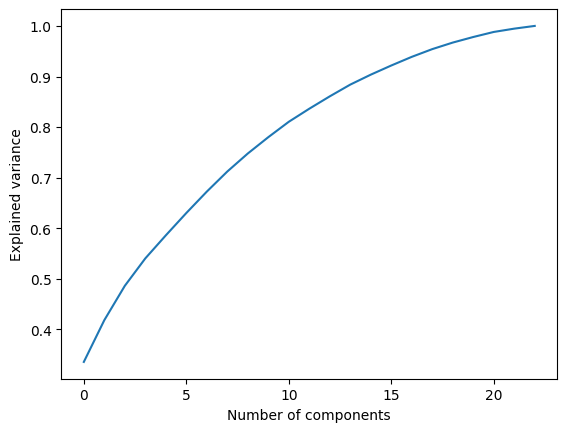

In [63]:
plt.plot(np.cumsum(pca_23.explained_variance_ratio_ ))
plt.xlabel("Number of components")
plt.ylabel("Explained variance")

In [64]:
pca_18 = PCA(n_components=18, random_state=42)
pca_18.fit(X)
#X_pca_18 = pca_18.transform(X)
X_PCA18 = pd.DataFrame(pca_18.transform(X), columns=[f'PCA{i}' for i in range(1, 19)], index=X.index) #To ostatnei do zachowania indexów
X_PCA18

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0   -0.847261  0.935308  0.288260 -0.869561  0.221082 -0.054067  0.169570   
1   -1.159383 -1.050449 -0.924038  1.008199 -1.739934 -2.315387 -0.188550   
2    2.948761  2.411954  0.964625 -1.058636 -1.556212 -0.710954 -2.185234   
3    4.709104 -2.163698 -3.072471 -0.349125 -0.278656 -1.957773 -0.115310   
4   -0.443433 -0.458184 -0.488609 -0.136594 -0.052386 -0.053858 -0.844684   
..        ...       ...       ...       ...       ...       ...       ...   
395 -2.470377  0.233962  0.835331  0.252571  0.568403  0.713068 -0.060082   
396 -3.555023 -0.066697  0.157105  0.321833  0.146691 -0.023545  0.617350   
397 -2.859641 -0.553873 -0.105042  0.377773 -0.478930 -0.631854 -0.733470   
398 -2.980250 -0.707861  0.063058  0.536869 -0.780428 -1.357090  0.279063   
399 -3.172068  0.523324  0.400183  0.052522  0.774163  0.270293  0.239153   

         PCA8      PCA9     PCA10     PCA11     PCA12     PCA13     PCA14  \
0    0.302343 -0.103506 -0.635445 -0.032097 -0.031194 -1.242834  1.009669   
1    0.447346  0.558911  0.222779 -1.121368 -0.033513 -0.537156  0.690433   
2    0.611985 -0.871246  1.290435  0.010799 -2.186848  1.711895 -0.876055   
3    0.191722 -2.582686 -1.084537  0.931098  0.277989  0.389794  0.234897   
4   -0.132045  0.932277 -1.198002 -0.409321  0.359970  0.523107 -0.252221   
..        ...       ...       ...       ...       ...       ...       ...   
395 -0.013157 -0.200986  0.035780 -0.623914 -0.173904  0.288732 -0.668354   
396  0.317467 -0.592002  0.434152  0.766812  0.038914 -0.358021  0.092405   
397  1.104329 -0.034960  0.236048  0.119184  0.817743  0.059387  0.692536   
398  0.463550 -0.248376  0.674174  0.478073  0.081435 -0.331381  0.863687   
399  0.493926 -0.861937  0.069952  0.749463 -0.145628 -0.300072 -0.157407   

        PCA15     PCA16     PCA17     PCA18  
0   -0.887597  0.523586 -0.298563 -1.114041  
1   -0.382495  1.173747  0.481507  1.303557  
2    0.692715  0.677925  0.392024  0.512088  
3    2.027460  0.780476 -1.059315 -0.351123  
4    0.469896  0.717974  0.231996  0.697609  
..        ...       ...       ...       ...  
395 -0.420899 -0.028876  0.062681  0.125898  
396 -0.067968  0.375922 -0.104568 -0.595913  
397 -0.095396  0.023270 -0.367043 -0.672738  
398 -0.090194  0.087047 -0.089053 -0.521878  
399  0.232359  0.249655  0.126037 -0.100690  

[329 rows x 18 columns]

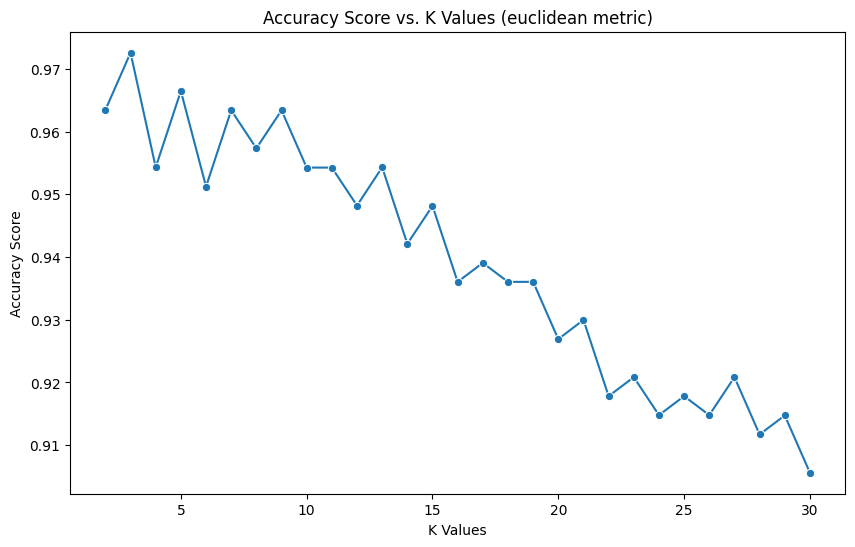

Dla metryki: euclidean najlepsze K to: 3 dokładność wynosi dla niego: 0.97 z odchyleniem standardowym 0.02


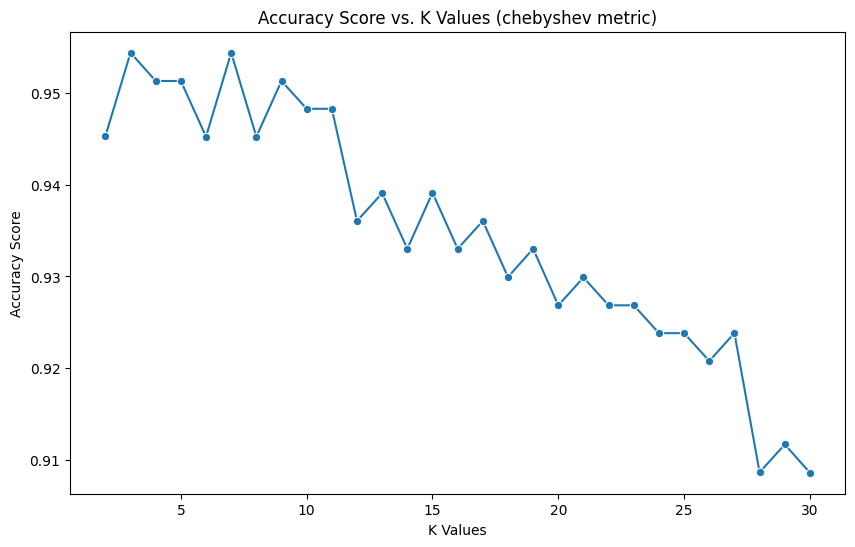

Dla metryki: chebyshev najlepsze K to: 3 dokładność wynosi dla niego: 0.95 z odchyleniem standardowym 0.01


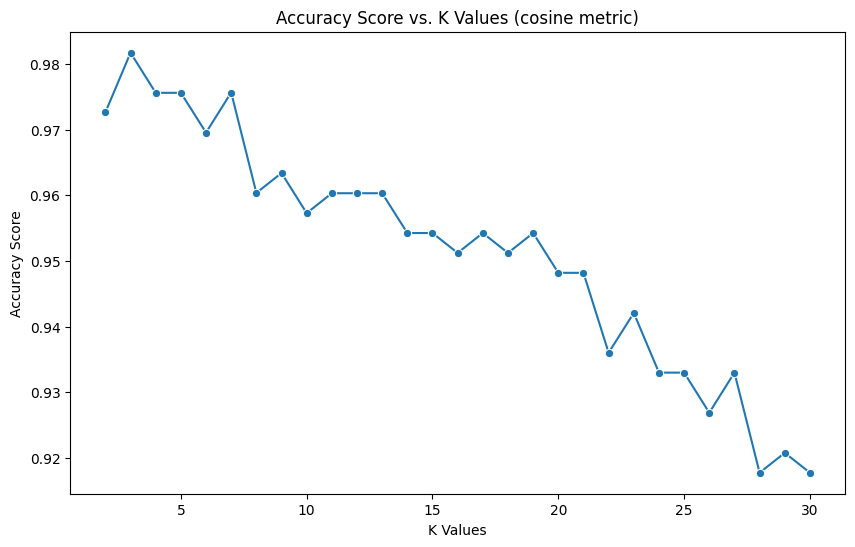

Dla metryki: cosine najlepsze K to: 3 dokładność wynosi dla niego: 0.98 z odchyleniem standardowym 0.01


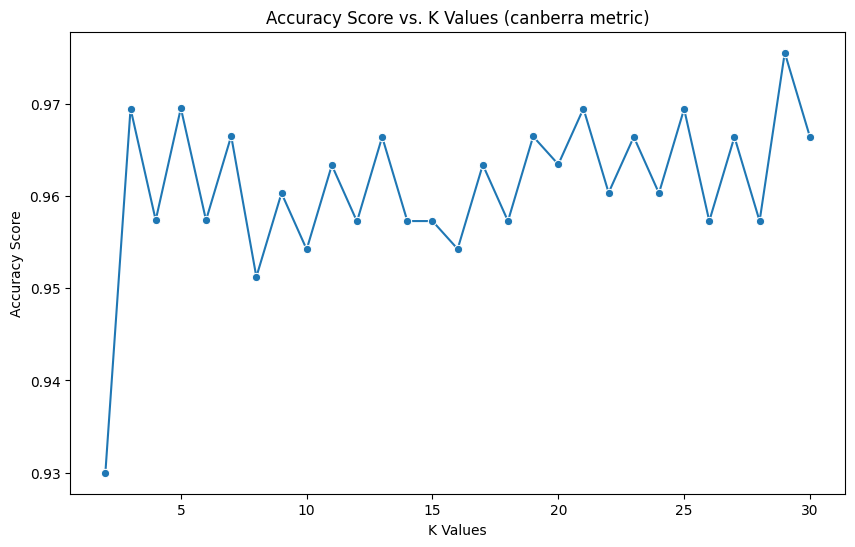

Dla metryki: canberra najlepsze K to: 29 dokładność wynosi dla niego: 0.98 z odchyleniem standardowym 0.02


In [65]:
#Testy dla PCA18
all_data = []
for metric in metrics:
    res = evaluate_knn_with_metric(X_PCA18, y, metric=metric)
    all_data.append(res)
    knn_results['KNN PCA18 ustandaryzowany ' + res[0] + " k=" + str(res[1])] = res

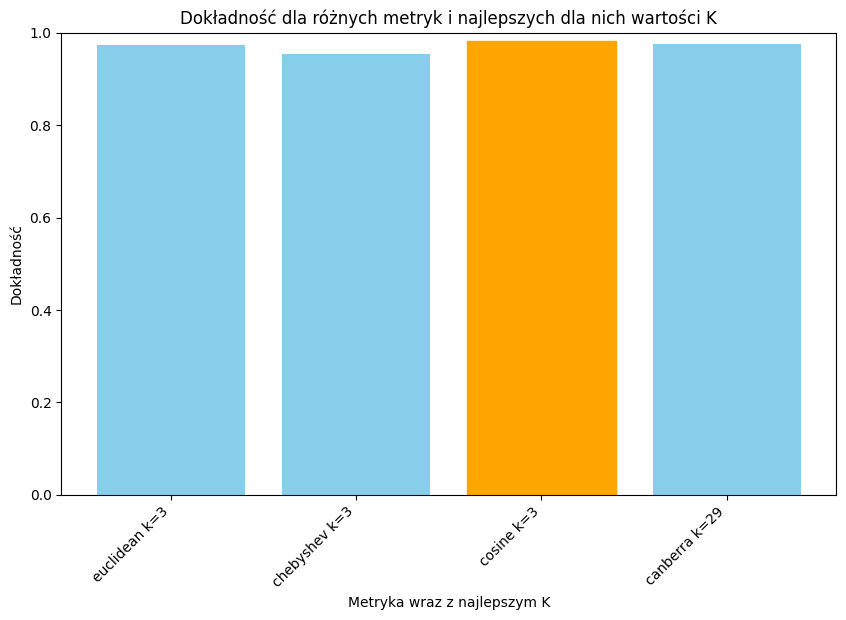

In [66]:
plot_accuracy(all_data)

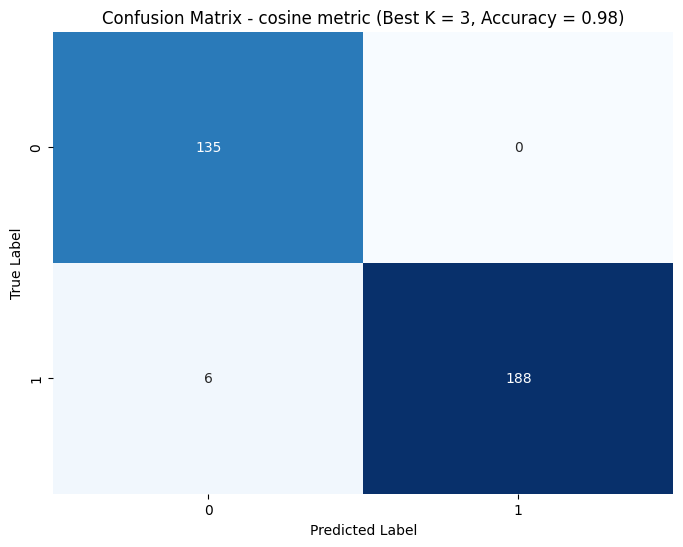

In [67]:
plot_confusion_matrix(select_best(all_data))

In [68]:
draw_summary_data_frame(knn_results)

Accuracy Standard Deviation
KNN PCA14 znormalizowany canberra k=2         99.39%              0.75%
KNN znormalizowany z wagami euclidean k=4     99.09%              0.75%
KNN PCA14 znormalizowany cosine k=2           99.09%              1.21%
KNN znormalizowany chebyshev k=5              98.78%              1.14%
KNN znormalizowany z wagami chebyshev k=5     98.78%              1.14%
KNN ustandaryzowany z wagami cosine k=2       98.78%              1.14%
KNN znormalizowany z wagami cosine k=2        98.78%              1.15%
KNN PCA14 znormalizowany euclidean k=2        98.78%              1.77%
KNN ustandaryzowany z wagami euclidean k=2    98.48%              0.96%
KNN znormalizowany euclidean k=3              98.48%              0.97%
KNN ustandaryzowany cosine k=3                98.48%              1.66%
KNN PCA18 ustandaryzowany cosine k=3          98.17%              1.14%
KNN PCA14 znormalizowany chebyshev k=3        98.17%              1.77%
KNN PCA18 ustandaryzowany canberra k=29       97.56%              2.49%
KNN ustandaryzowany z wagami chebyshev k=2    97.27%              1.13%
KNN znormalizowany z wagami canberra k=4      97.27%              1.76%
KNN ustandaryzowany euclidean k=3             97.27%              2.01%
KNN ustandaryzowany chebyshev k=3             97.26%              1.14%
KNN znormalizowany cosine k=3                 97.26%              1.49%
KNN PCA18 ustandaryzowany euclidean k=3       97.26%              2.43%
KNN znormalizowany canberra k=3               96.97%              1.66%
KNN ustandaryzowany canberra k=9              96.66%              1.76%
KNN ustandaryzowany z wagami canberra k=9     96.66%              1.76%
KNN bez normalizacji z wagami canberra k=4    95.74%              2.61%
KNN PCA18 ustandaryzowany chebyshev k=3       95.44%              0.99%
KNN bez normalizacji canberra k=3             95.44%              2.35%
KNN bez normalizacji z wagami cosine k=24     87.54%              1.73%
KNN bez normalizacji cosine k=3               86.63%              1.99%
KNN bez normalizacji euclidean k=3             75.4%              4.02%
KNN bez normalizacji z wagami euclidean k=2   75.38%              4.53%
KNN bez normalizacji z wagami chebyshev k=2   73.25%              2.95%
KNN bez normalizacji chebyshev k=2            72.96%              2.49%